**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
# IMPORTANTE:

# Update plotly: uncomment and run the following line:
#!pip install plotly --upgrade

# Luego comentar de nuevo esa línea, y reiniciar el entorno de ejecución para ejecutar todas las celdas del trabajo.

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.1.0'

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
# plt.style.use('ggplot')
%matplotlib inline
seaborn.set_context('talk')

# Set style
seaborn.set_style("darkgrid")
seaborn.set_palette('pastel')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
orig_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df = orig_df
melb_df[:3]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
print( "Las", len(melb_df.columns), "variables originales del dataset son: ", list(melb_df.columns))

Las 21 variables originales del dataset son:  ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


## Descripción de columnas
- **Suburb**: Barrios de Melbourne.
- **Address**: Self explanitory.
- **Rooms**: Number of rooms
- **Price**: Price in dollars
- **Method**: 
  - S - property sold; 
  - SP - property sold prior; 
  - PI - property passed in; 
  - PN - sold prior not disclosed; 
  - SN - sold not disclosed; 
  - NB - no bid; 
  - VB - vendor bid; 
  - W - withdrawn prior to auction; 
  - SA - sold after auction; 
  - SS - sold after auction price not disclosed. 
  - N/A - price or highest bid not available.
- **Type**: 
  - br - bedroom(s); 
  - h - house,cottage, villa, semi, terrace; 
  - u - unit, duplex; 
  - t - townhouse; 
  - dev site - development site; 
  - res - other residential.
- **SellerG**: Real Estate Agent (Agente inmobiliario)
- **Date**: Date sold
- **Distance**: Distance from CBD in Kilometres (Central Business District)
- **Post Code**: Código postal.
- **Regionname**: General Region (West, North West, North, North east …etc)
- **Propertycount**: Number of properties that exist in the suburb.
- **Bedroom2** : Scraped # of Bedrooms (from different source)
- **Bathroom**: Number of Bathrooms
- **Car**: Number of carspots (Número de plazas de coche)
- **Landsize**: Land size in Metres (Tamaño del terreno)
- **BuildingArea**: Building Size in Metres (Tamaño área construida)
- **YearBuilt**: Self explanitory
- **CouncilArea**: Governing council for the area (Consejo de gobierno de la zona)
- **Lattitude**: Self explanitory
- **Longtitude**: Self explanitory

# Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [ ]:
melb_df.shape

(13580, 21)

# Ejercicio 1 - Puntos 1 y 2

## DATOS FALTANTES

Lo primero que hacemos es ver la cantidad de datos faltantes en el dataset, ya sea en cada variable (dos celdas de abajo) y en conjunto en el total; y analizar qué posible modelo de pérdida tenemos, para según eso, poder tomar decisiones al respecto.

In [ ]:
# Vemos aquellas columnas con valores nulos (cantidad absoluta de null)
melb_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# Vemos aquellas columnas con valores nulos (% de null sobre el total)
melb_df.isnull().sum()/len(melb_df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [ ]:
# how many total missing values do we have?
missing_values_count = melb_df.isna().sum()
total_cells = numpy.product(melb_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

4.648292306613367

Hay nulos en las siguientes variables:

Car,                62  =>   0.45 % del total de casos de esa variable

BuildingArea,     6450  =>  47.49 %  del total de casos de esa variable

YearBuilt,        5375  =>  39.58 %  del total de casos de esa variable

CouncilArea,      1369  =>  10.08 %  del total de casos de esa variable






Si consideramos el dataset completo: el total de datos faltantes, representa un 4,64% del total de datos del dataset.

Pero, como vimos arriba, los mismos están concentrados sólo en algunas variables. 

**Usando el paquete `missingno` podemos hacer un análisis gráfico de los datos faltantes.**


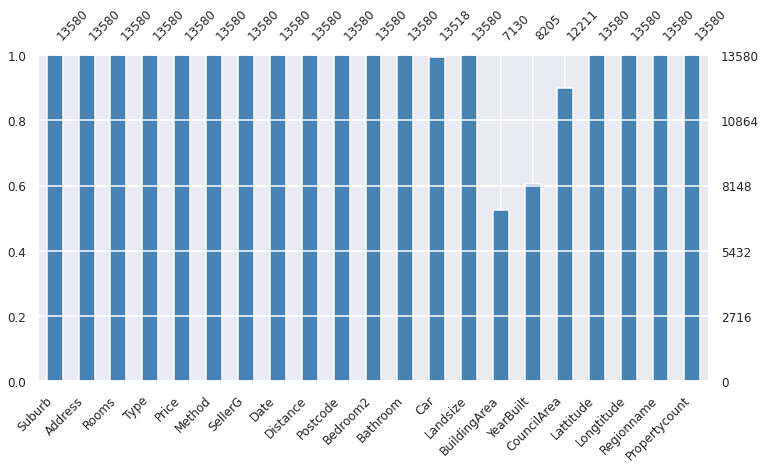

In [ ]:
import missingno as msno
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

El gráfico anterior representa lo ya descripto con números y porcentajes respecto a datos nulos.

En el gráfico siguiente (azul oscuro) visualizamos las posiciones de los datos faltantes en el dataset, considerando el orden "por default" que tenía el conjunto de datos. 

El gráfico posterior (color rojo) es similar, pero ejecutado para una muestra aleatoria de datos (sólo 400), para evitar la influencia del orden de datos, y también para tener mayor claridad en la visualización (datos menos comprimidos). 

Con estos gráficos se prentende analizar posibles "correlaciones" entre los datos faltantes.

Lo que se busca es poder accionar sobre el dataset sin incorporar nuevos errores, y para ello, es necesario corroborar que el mecanismo de pérdida sea aleatorio.

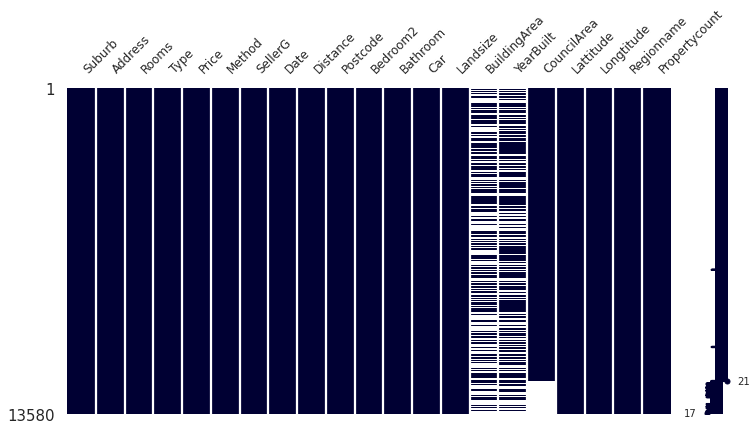

In [ ]:
msno.matrix(melb_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

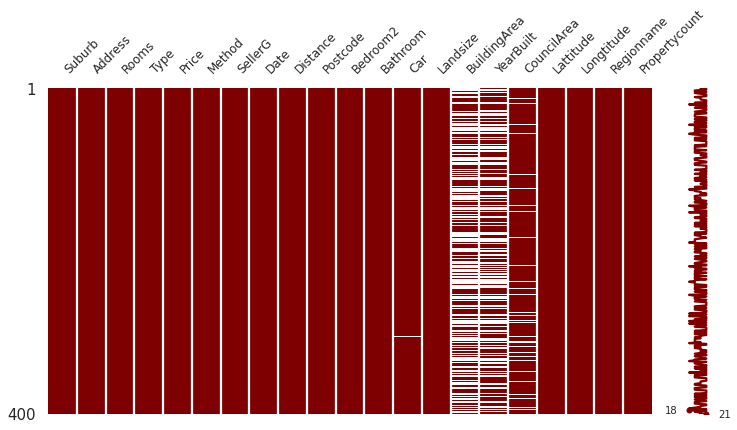

In [ ]:
msno.matrix(melb_df.sample(400),figsize=(12, 6), fontsize=12, color=[0.5,0,0])

**Se observa una correlacion entre los datos faltantes de las variables "Building area" y "Year built".**

Parece que para muchas propiedades, faltan ambos datos (año de construcción y área construida -BuildingArea-) en los sitios en donde se recoletaron los datos. Sin embargo, en esos casos sí se observa que está el dato de Landsize (tamaño del terreno), por lo cual podría estar sucediendo que se estén confundiendo estas variables; y landsize tenga un dato que mezcla área de terreno con área construida, según el caso. Pero es algo que no podemos deducir con este análisis.

Los datos perdidos de CouncilArea no presentan una  correlación evidente con las otras variables.


**Análisis pormenorizado de correlaciones:**

Ordenamos los datos por BuildingArea

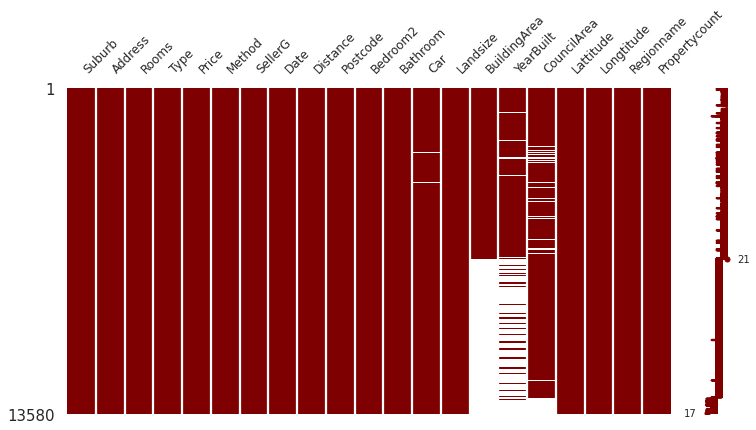

In [ ]:
sorted_melb_df = melb_df.sort_values('BuildingArea')
msno.matrix(sorted_melb_df,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

Hacemos heatmap de datos faltantes:

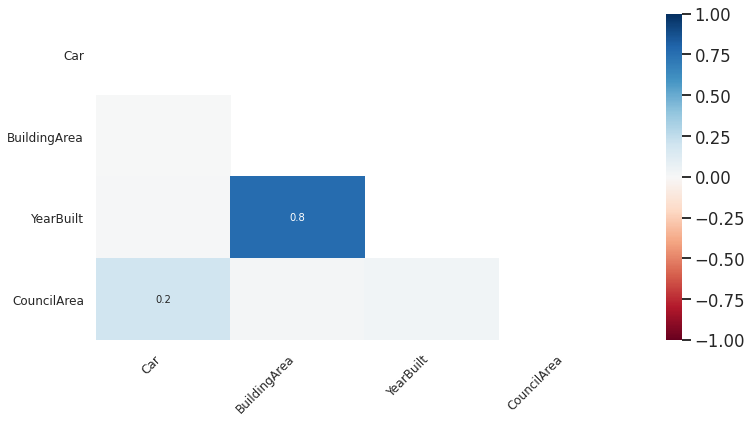

In [ ]:
msno.heatmap(melb_df,figsize=(12, 6), fontsize=12)

Vemos que los datos perdidos de YearBuilt y BuildingArea tienen una alta correlación.

También vemos cierta correlación entre los faltantes de  Car y CouncilArea, aunque es baja, y también en este caso sabemos que son poquitos datos.

**En síntesis, no podemos decir que sea "Missing At Random" (no hay "pérdida aleatoria"): porque la cantiadad de datos que estamos perdiendo es mucha, y además hay correlación entre las pérdidas.**

Entonces nos preguntamos cuáles de estas variables necesitamos para luego decidir si las mantenemos e imputamos, o directamente las descartamos.

En el caso de CouncilArea, como es categórica, podríamos buscar imputar sus valores basándonos en información de otra fuente o dataset (AirBnB) usando por ejemplo el dato de suburbio o latitud-longitud.

BuildingArea y YearBuilt son un problema, porque tienen una gran cantidad de datos perdidos; y no podemos trabajar con ellas así. Eliminar esas variables es una decisión difícil porque sabemos que los "metros cuadrados de la propiedad" influyen en su precio, y también influye "la antigüedad del inmueble" basado en su fecha de construcción. Por otro lado, dejar estas variables implica tener que imputarlas, y estadísticamente, imputar esa cantidad tan alta de datos es algo poco recomendable.

## DECISIONES INICIALES

* Dada la poca cantidad de casos perdidos de **Car**, decidimos dejar la variable en el dataset, ya que consideramos que puede ser relevante en la determinación del precio; pero la decisión respecto a imputarlos con algún valor, o eliminar los casos, la realizaremos luego de analizar su distribución en el punto siguiente, al evaluar también la existencia de casos atípicos en esta variable.

* De manera similar procederemos con **Council Area**, decidiendo mantenerla por el momento en el dataset (se nos solicita en próximos ejercicios realizar imputaciones sobre ella, motivo por el cual la dejamos).

* **Building Area y Year Built**, tal como fueron recolectadas, son variables que nos brindan información sólo para -aproximadamente- la mitad del dataset. Por lo cual, creemos que para dejarlas, debido a su importancia como "predictoras de precio", deberíamos contar con información en las demás variables, para con ello poder intentar hacer alguna imputación de los casos perdidos de YB y BA. Luego de imputarlas, habría que analizar si la misma resulta aceptable.

* **En general respecto a qué columnas o variables seleccionar vs. descartar en función del objetivo o problema**: " predicción del valor de la propiedad"; pensamos en una primera instancia lo siguiente:

  * Si observamos todas las variables del dataset, a grandes rasgos tendríamos:

    1) Variables que se refieren a **"características de la propiedad"**: 'Type', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Landsize'.

    2) Variables que se refieren a **"aspectos de ubicación o geográficas"**: 'Regionname', 'CouncilArea', 'Suburb', 'Postcode', 'Address', 'Lattitude', 'Longtitude'; 'Distance', 'Propertycount'.

    3) Variables relacionadas específicamente con **cuestiones de la "venta de la propiedad"**: 'Price', 'Method', 'SellerG', 'Date' (Date sold).

  Sin obervar aún las distribuciones de las mismas, lo lógico sería pensar en quedarnos con aquellas variables que podrían aportar mayor información en la predicción del precio, y eliminar aquellas que no lo hagan, o bien aportan la misma información que alguna otra variable.

  En este sentido, podríamos:
  
  - Observar si es similar o diferente la información que aportan 'Rooms', 'Bedroom2', 'Bathroom', 'Car', para quedarnos sólo con alguna/s de ellas. 
  
  - Siguiendo la misma línea de pensamiento, y respecto a las variables geográficas, desde ya se decide no trabajar por el momento con variables con mucha precisión (y por lo tanto con muchos valores diferentes), tales como 'Lattitude', 'Longtitude', 'Address' (incluso ésta última tiene la desventaja de tener un formato poco sencillo de trabajar). Consideramos que su eliminación del dataset, no implica pérdida de información, ya que puede ser cubierta por otras variables. 'Postcode', si bien podría tener un tratamiento similar a las variables eliminadas, se la mantiene en el dataset debido a que se la utilizará como "key" para realizar el merge con la información del dataset de "AirBnB".

  - Con respecto a las variables relacionadas con la venta en sí misma, lógicamente 'Price' se incluye por ser nuestra variable "objetivo"; pero habría que analizar si 'Method' y 'SellerG' brindan información relevante.


* Para tomar las decisiones que quedaron pendientes, analizamos con mayor detalle las variables a continuación (dentro de la sección Datos erróneos).

## DATOS ERRÓNEOS

### ANÁLISIS EXPLORATORIO de distribuciones, y datos atípicos (outliers)

Notar: en cada variable explorada a continuación, se muestran las tablas y gráficos generados, y luego se presentan las conclusiones a las que se arriba con el análisis.

#### **Análisis general**

Primero vemos en forma general todas las descriptivas de las variables cargadas con valores numéricos por un lado, y con valores string por el otro (recordar que Python no considera en estos cálculos los valores nulos vistos arriba):

In [ ]:
#descriptivas de var. cargadas con números
melb_df.describe().round()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0,13580.0,13580.0,13580.0,13580.0,13580.0,13518.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0
mean,3.0,1075684.0,10.0,3105.0,3.0,2.0,2.0,558.0,152.0,1965.0,-38.0,145.0,7454.0
std,1.0,639311.0,6.0,91.0,1.0,1.0,1.0,3991.0,541.0,37.0,0.0,0.0,4379.0
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,144.0,249.0
25%,2.0,650000.0,6.0,3044.0,2.0,1.0,1.0,177.0,93.0,1940.0,-38.0,145.0,4380.0
50%,3.0,903000.0,9.0,3084.0,3.0,1.0,2.0,440.0,126.0,1970.0,-38.0,145.0,6555.0
75%,3.0,1330000.0,13.0,3148.0,3.0,2.0,2.0,651.0,174.0,1999.0,-38.0,145.0,10331.0
max,10.0,9000000.0,48.0,3977.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.0,146.0,21650.0


Ojo: 'Postcode' está cargada como "número" pero en realidad se trataría como una variable "categórica nominal".

*OBSERVACIONES VARIABLES NUMÉRICAS*

**Hay valores ceros (posibles casos raros, ya que se espera que tengan valor > 0) en:**

    - Bedroom2	
    - Bathroom	
    - Landsize	
    - BuildingArea	
    - Notar: "Car" también tiene ceros, pero esta variables es más compleja porque SÍ es posible que haya inmuebles sin garage (tenemos que analizarla por ejemplo comparando con el tipo de inmueble).


**Hay un año atípico inferior en year built**.

**Hay atípicos superiores en:**

    - Landsize	
    - BuildingArea
    - Bedroom2	
    - Bathroom	
    - Car
    - Precio: el Precio max es atípico y existe; o es un error?
**Por ende debemos:** ANALIZAR sus distribuciones y casos particulares, para decidir una de estas acciones:

* Eliminar 
* Dejar como está
* Imputar (y determinar cómo imputar)



In [ ]:
#descriptivas de var. cargadas como objeto
melb_df.describe(include=['O'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,2 Bruce St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


Ojo: 'Date' está como categórica pero sería "numérica continua" en caso de utilizarla.

* *OBSERVACIONES VARIABLES CATEGÓRICAS*

  * Como ya vimos arriba, CouncilArea tiene nulos
  * Según la descripcion de las columnas brindadas hay 11 categorias para Method. Sin embargo en el dataset solo aparecen 5. 
  * Algunas variables como Suburb, Address, SellerG y CouncilArea en cierta medida, tienen una cantidad muy grande de categorias, lo que hace difícil su tratamiento y su interpretación.
  * SellerG tiene 268 vendedores, siendo Nelson el de mayor frecuencia. ¿realmente aporta información esta variable? (se analiza más adelante)
  * Method y SellerG son variables que, en tal caso, aportarían información sobre el precio de venta en terminos de la negociación. Si bien a esta altura del análisis no se puede concluir sobre la influencia de estas variables sobre el objetivo principal (predecir el precio), se las explora más adelante para tomar una decisión.

#### **Análisis detallado**

##### **Rooms** (Numérica) -Ambientes-

In [ ]:
print(melb_df['Rooms'].describe())
print(melb_df['Rooms'].value_counts())
print('Nulos: ',sum(melb_df['Rooms'].isna()))
print('0s: ',sum(melb_df['Rooms'] == 0)) # Una casa no puede tener 0 Ambientes

count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64
Nulos:  0
0s:  0


Text(0.5, 1.0, "Histograma 'Rooms'")

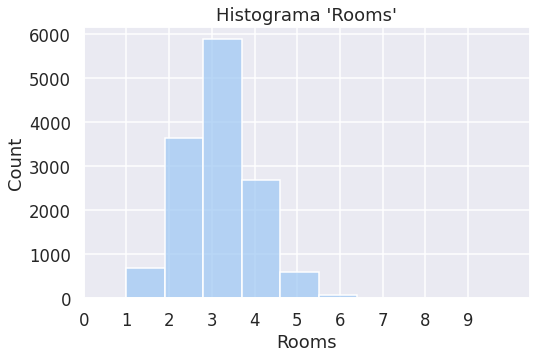

In [ ]:
# Histograma previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df['Rooms'], bins=10, weights=None, ax=ax)
ax.set_xticks(range(0,10))
ax.set_title("Histograma 'Rooms'")

Text(0.5, 1.0, "Distribucion de 'Rooms' segun Type")

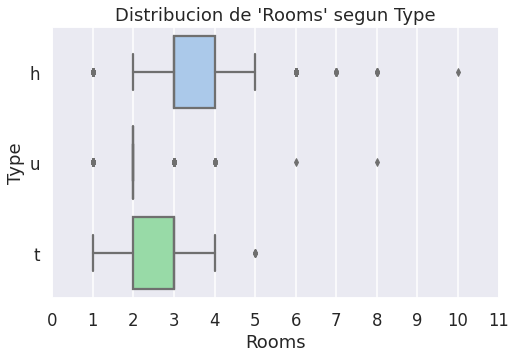

In [ ]:
# Rooms y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=melb_df,
    x='Rooms',
    y='Type',
    ax=ax)
ax.set_xticks(range(0,12))
ax.set_title("Distribucion de 'Rooms' segun Type")

In [ ]:
# Percentiles superiores

print('10% >', melb_df['Rooms'].quantile(.90))
print('5% >', melb_df['Rooms'].quantile(.95))
print('1% >', melb_df['Rooms'].quantile(.99))
print('0.5% >', melb_df['Rooms'].quantile(.995))

# Casos a analizar:
# 6       (67)
# 7       (10)
# 8        (8)
# 10       (1)

10% > 4.0
5% > 5.0
1% > 5.0
0.5% > 6.0


In [ ]:
melb_df_rooms = melb_df[(melb_df['Rooms'] <= melb_df['Rooms'].quantile(.99))]

In [ ]:
len(melb_df_rooms)

13494

In [ ]:
print("Perdida de datos")
print("----------------")
print("Con respecto al dataset original:", "{:.2f}".format((1 - len(melb_df_rooms) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
----------------
Con respecto al dataset original: 0.63% del dataset


Text(0.5, 1.0, "Histograma 'Rooms'")

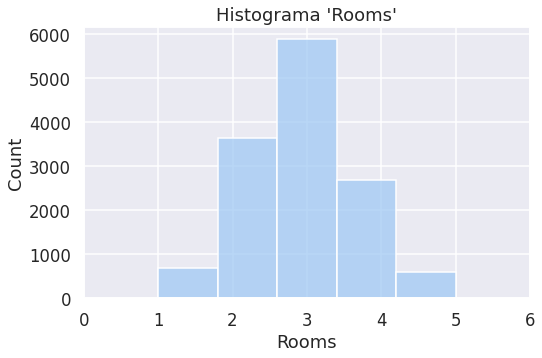

In [ ]:
# Histograma después de la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df_rooms['Rooms'], bins=5, weights=None, ax=ax)
ax.set_xticks(range(0,7))
ax.set_title("Histograma 'Rooms'")

Text(0.5, 1.0, "Distribucion de 'Rooms' segun Type")

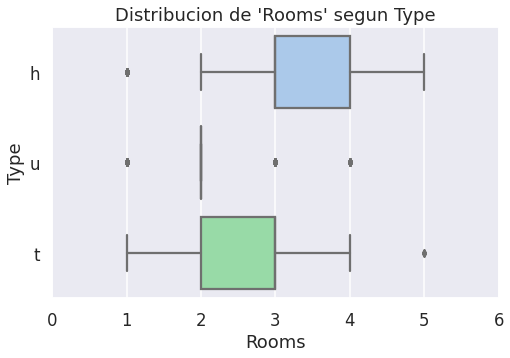

In [ ]:
# Rooms y Type
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=melb_df_rooms,
    x='Rooms',
    y='Type',
    ax=ax)
ax.set_xticks(range(0,7))
ax.set_title("Distribucion de 'Rooms' segun Type")

In [ ]:
melb_df_rooms['Type'].value_counts()

h    9365
u    3015
t    1114
Name: Type, dtype: int64

In [ ]:
descr = melb_df_rooms.groupby('Type')['Rooms'].describe()
descr

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,9365.0,3.233316,0.800550,1.0,3.0,3.0,4.0,5.0
t,1114.0,2.837522,0.672654,1.0,2.0,3.0,3.0,5.0
u,3015.0,1.960531,0.615629,1.0,2.0,2.0,2.0,4.0


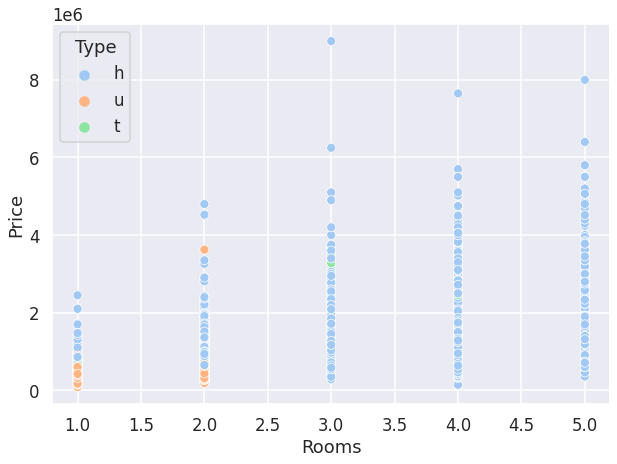

In [ ]:
fig = plt.figure(figsize=(10,7))
seaborn.scatterplot(x=melb_df_rooms['Rooms'], 
                    y=melb_df_rooms['Price'], 
                    hue=melb_df_rooms['Type'])

**Conclusiones de Exploración y Curación Rooms:**

Vemos que antes de la curación la variable Rooms, no tiene datos nulos ni ceros que puedan estar mal cargados; pero si tiene outliers en el extremo derecho. Esto se observa más en las estadísticas descriptivas que en el histograma. De este último se puede apreciar que la moda es 3 habitaciones (Rooms). Luego de ver los cuantiles del extremo superior, decidimos eliminar aquellos valores superiores al cuantil 0.99, es decir, los casos con más de 5 rooms; ya que conservarlos podría afectar al análisis, y quitarlos no implica una gran perdida de información (teniendo en cuenta el objetivo principal de predicción de precio de las propiedades).

Después de la eliminación de outliers, al observar los boxplot de Rooms diferenciados por Type, vemos que las propiedades “h” tienen en general más “Rooms” que el tipo “t”; y nos llama la atención la distribución compacta de “Rooms” en el tipo “u”.  Chequeamos la cantidad de datos que presenta cada “type”, y observamos que las tres categorias tienen mas de 1.000 datos (cantidad significativa). Sin embargo, los datos no estan equitativamente distribuidos entre las categorias ("h" tiene aprox el triple de datos que "u", y "u" el triple de "t"). 

Generamos las descriptivas de “Rooms” para cada “Type” y allí vemos que en el caso del “Type" denominado "u” el 50% central de los datos (q1 a q3) tienen 2 Rooms. Esto explica lo mencionado anteriormente, y es coherente con lo esperado ya que esta tipología de propiedad se caracteriza por tener muy pocos ambientes.

En el scatterplot final, buscamos obtener una primera impresión de la relación entre los precios de las propiedades y Rooms, considerando el objetivo principal de predicción del precio. Lo que se puede observar es que los precios pueden llegar a ser mas caros a medida que la cantidad de habitaciones aumenta. Sin embargo esto sería un analisis parcial, a completar con el resto de las variables que puedan llegar a influir. Notar que en el grafico predomina el color correspondiente al tipo 'h' debido a la diferencia de proporciones de datos en las categorías, explicada con anterioridad. 

##### **Bedrooms2** (Numérica) - Dormitorios-

In [ ]:
print(melb_df['Bedroom2'].describe())
print(melb_df['Bedroom2'].value_counts())
print('Nulos: ',sum(melb_df['Bedroom2'].isna()))
print('0s: ',sum(melb_df['Bedroom2'] == 0)) # Una casa no puede tener 0 habitaciones

count    13580.000000
mean         2.914728
std          0.965921
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: Bedroom2, dtype: float64
3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
10.0       1
20.0       1
Name: Bedroom2, dtype: int64
Nulos:  0
0s:  16


Text(0.5, 1.0, "Histograma 'Bedroom2'")

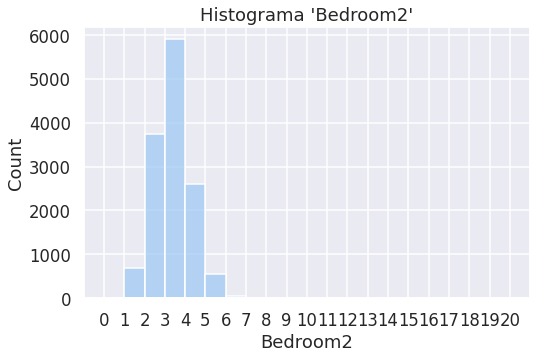

In [ ]:
# Histograma previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df['Bedroom2'], bins=20, weights=None, ax=ax)
ax.set_xticks(range(0,21))
ax.set_title("Histograma 'Bedroom2'")

Text(0.5, 1.0, 'Distribucion de Bedroom2 según Type')

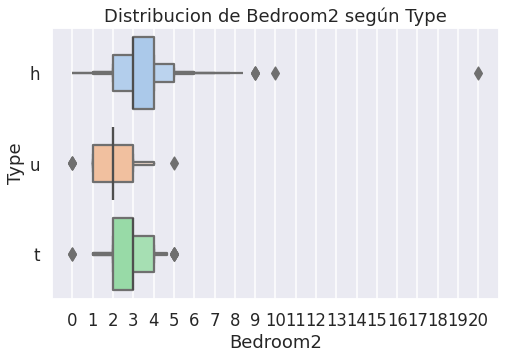

In [ ]:
# Bedroom2 y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxenplot(
    data=melb_df,
    x='Bedroom2',
    y='Type',
    ax=ax
)
ax.set_xticks(range(0,21))
ax.set_title("Distribucion de Bedroom2 según Type")

In [ ]:
# Se convierten a nulo los valores en 0 para imputarlos más tarde
melb_df_bedroom2 = melb_df
melb_df_bedroom2['Bedroom2'] = melb_df['Bedroom2'].replace(0, numpy.nan)

In [ ]:
print('10% >', melb_df_bedroom2['Rooms'].quantile(.90))
print('5% >', melb_df_bedroom2['Rooms'].quantile(.95))
print('1% >', melb_df_bedroom2['Rooms'].quantile(.99))
print('0.5% >', melb_df_bedroom2['Rooms'].quantile(.995))

# Casos a analizar:
# 7 (10)
# 8 (5)
# 9 (3)
# 20 (1)
# 10 (1)

10% > 4.0
5% > 5.0
1% > 5.0
0.5% > 6.0


In [ ]:
melb_df_bedroom2 = melb_df[(melb_df["Bedroom2"] <= melb_df["Bedroom2"].quantile(0.995)) | (melb_df["Bedroom2"].isna())]

Text(0.5, 1.0, "Histograma 'Bedroom2'")

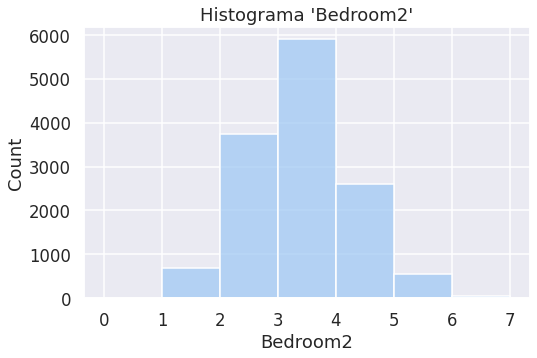

In [ ]:
# Histograma post curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df_bedroom2['Bedroom2'], bins=range(0,8), weights=None, ax=ax)
ax.set_xticks(range(0,8))
ax.set_title("Histograma 'Bedroom2'")

Text(0.5, 1.0, 'Distribucion de Bedroom2 según Type')

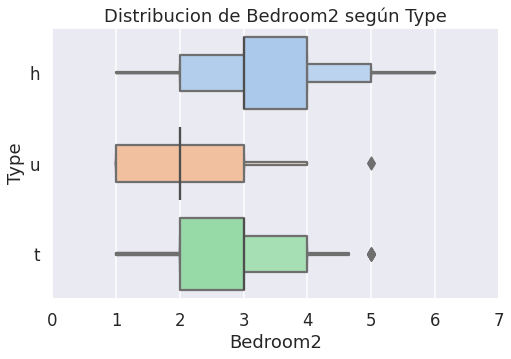

In [ ]:
# Bedroom2 y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxenplot(
    data=melb_df_bedroom2,
    x='Bedroom2',
    y='Type',
    ax=ax
)
ax.set_xticks(range(0,8))
ax.set_title("Distribucion de Bedroom2 según Type")

In [ ]:
melb_df_bedroom2['Type'].value_counts()

h    9429
u    3017
t    1114
Name: Type, dtype: int64

In [ ]:
descr = melb_df_bedroom2.groupby('Type')['Bedroom2'].describe()
descr

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,9418.0,3.222234,0.831182,1.0,3.0,3.0,4.0,6.0
t,1112.0,2.819245,0.669960,1.0,2.0,3.0,3.0,5.0
u,3014.0,1.968480,0.625810,1.0,2.0,2.0,2.0,5.0


In [ ]:
print("Perdida de datos")
print("-----------------")
print("Con respecto al dataset original: ", "{:.2f}".format((1 - len(melb_df_bedroom2) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
-----------------
Con respecto al dataset original:  0.15% del dataset


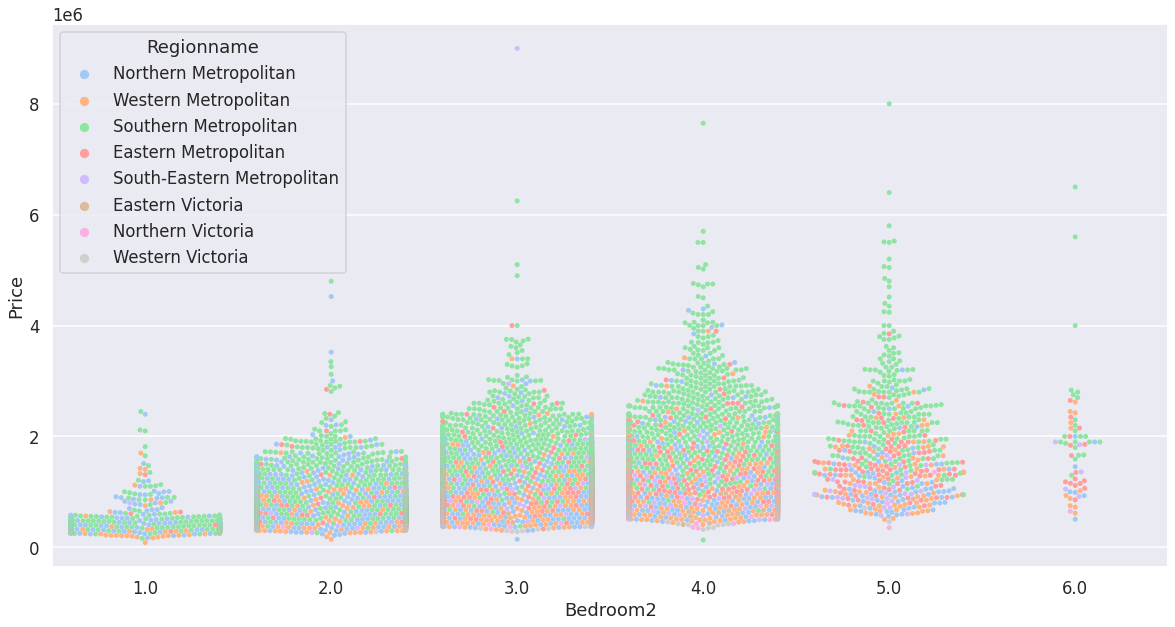

In [ ]:
fig = plt.figure(figsize=(20,10))
seaborn.swarmplot(x=melb_df_bedroom2['Bedroom2'], 
                    y=melb_df_bedroom2['Price'], 
                    hue=melb_df_bedroom2['Regionname'])

In [ ]:
melb_df_bedroom2['Bedroom2'].describe()

count    13544.000000
mean         2.910145
std          0.932787
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: Bedroom2, dtype: float64

In [ ]:
#melb_df = melb_df_bedroom

**Conclusiones de Exploración y Curación Bedrooms2:**

Vemos que antes de la curación Bedroom2 no tiene nulos, pero tiene 16 valores en cero, y valores atípicos en el extremo derecho de la distribución (máx=20). Además, se aprecia que la moda de esta variable es 3 (similar a Rooms). Luego, en los boxplot sin curar se observan los casos atípicos señalados (similar a Rooms), y en el cálculo de cuantiles se ve que sólo un 0,5% de los datos tienen más de 6 Bedrooms. Tomamos la decisión de eliminar estos outliers.

Luego de dicha curación generamos: los boxplot de Bedroom2 diferenciados por “Type”, sus estadísticas descriptivas y el gráfico de la relación entre precio y Bedroom2 (categorizado por “Type”). En todos estos gráficos y medidas, vemos un comportamiento similar para Bedroom2 al que vimos con Rooms.

En el último grafico swarmplot, ampliamos la exploración con 'Regionname' en lugar de 'Type', ya que posiblemente es un buen predictor de precios. Lo que se observa en esta visualización (a diferencia de 'Type') es, por un lado, el desbalance en proporción de datos para cada valor de 'Bedroom2' (para 6 habitaciones hay muy pocos casos); y por otro lado, una posible relación positiva entre precio y cantidad de habitaciones para la región 'Southern Metropolitan'.

###### **Análisis conjunto de: Rooms y Bedrooms2** (Numéricas).

Dado que estas variables brindan información muy similar (en cuanto a la determinación del precio de una propiedad, y analizando desde la "perspectiva de negocio o práctica"), vemos qué relación hay entre ellas mediante una "tabla de contingencia":

In [ ]:
# Rooms y Bedroom2, previo a la curación
Bedroom2 = melb_df_bedroom2.Bedroom2
Rooms = melb_df_rooms.Rooms
pandas.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5
Bedroom2,,,,,
1.0,663,21,5,2,0
2.0,16,3539,162,19,1
3.0,2,74,5626,175,18
4.0,0,8,73,2473,42
5.0,0,1,5,15,531
6.0,0,0,0,0,2


**Conclusiones de Exploración y Curación de Rooms y Bedrooms2:**

Dado todo el analisis previo y lo que se observa en el crosstab, se llega a la conclusión que la informacion que brindan las variables 'Rooms' y 'Bedroom2' es muy similar. En particular, observamos que la diagonal principal del crosstab concentra la mayor cantidad de datos en terminos de frecuencia. 

Dentro del grupo se llevo a cabo una discusion sobre la semantica de las variables. Este crosstab nos da un indicio de su posible explicación. Por conocimiento de campo es esperable que haya mas ambientes que habitaciones, por lo que los valores por encima de la diagonal principal serian esperables comparados con el otro lado de la diagonal. Por ejemplo: un lugar que tiene 2 habitaciones y 4 ambientes es mas logico que una casa con 4 habitaciones y 2 ambientes. 

En base a estas observaciones, el hecho de que 'Rooms' es una variable original del dataset y no scrapeada, y ademas que no contiene datos nulos, decidimos quedarnos con esta variable y descartar 'Bedroom2'.

##### **Bathroom** (Numerica)

In [ ]:
print(melb_df['Bathroom'].describe())
print(melb_df['Bathroom'].value_counts())
print('Nulos: ',sum(melb_df['Bathroom'].isna()))
print('0s: ',sum(melb_df['Bathroom'] == 0)) # Una casa no puede tener 0 baños

count    13580.000000
mean         1.534242
std          0.691712
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Bathroom, dtype: float64
1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
8.0       2
7.0       2
Name: Bathroom, dtype: int64
Nulos:  0
0s:  34


Text(0.5, 1.0, "Histograma 'Bathroom'")

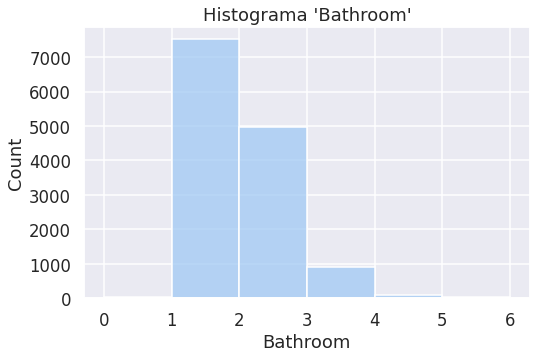

In [ ]:
# Histograma antes de eliminar outliers
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df['Bathroom'], bins=range(0,7), weights=None, ax=ax)
ax.set_xticks(range(0,7))
ax.set_title("Histograma 'Bathroom'")

Text(0.5, 1.0, "Distribucion de 'Bathroom' segun Type")

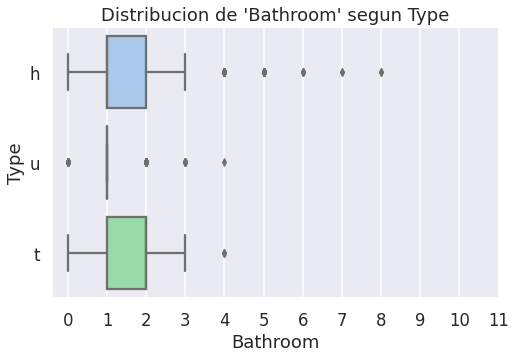

In [ ]:
# Rooms y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=melb_df,
    x='Bathroom',
    y='Type',
    ax=ax)
ax.set_xticks(range(0,12))
ax.set_title("Distribucion de 'Bathroom' segun Type")

In [ ]:
# Se convierten a nulo los valores en 0 para imputarlos mas tarde
melb_df_bathroom = melb_df
melb_df_bathroom['Bathroom'] = melb_df['Bathroom'].replace(0, pandas.NA)

In [ ]:
print('10% >', melb_df_bathroom['Bathroom'].quantile(.90))
print('5% >', melb_df_bathroom['Bathroom'].quantile(.95))
print('1% >', melb_df_bathroom['Bathroom'].quantile(.99))
print('0.5% >', melb_df_bathroom['Bathroom'].quantile(.995))

# Casos extremos
# 5.0      (28)
# 6.0       (5)
# 8.0       (2)
# 7.0       (2)

#melb_df[melb_df["Bathroom"]==0][['Bedroom2', 'Rooms']] 
# Todos tienen al menos un ambiente, se podría imputar con 1, o dependiendo la cantidad de habitaciones o categoría de tipo de casa.

10% > 2.0
5% > 3.0
1% > 4.0
0.5% > 4.0


In [ ]:
melb_df_bathroom = melb_df_bathroom[(melb_df_bathroom["Bathroom"] <= 
                                     melb_df_bathroom["Bathroom"].quantile(0.995)) |
                                    (melb_df_bathroom["Bathroom"].isna())]

In [ ]:
print("Perdida de datos")
print("----------------")
print("Con respecto al dataset original:", "{:.2f}".format((1 - len(melb_df_bathroom) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
----------------
Con respecto al dataset original: 0.27% del dataset


In [ ]:
descr = melb_df_bathroom.groupby('Type')['Bathroom'].describe()
descr

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,9397.0,1.601469,0.689928,1.0,1.0,1.0,2.0,4.0
t,1112.0,1.812950,0.594827,1.0,1.0,2.0,2.0,4.0
u,3000.0,1.190000,0.403263,1.0,1.0,1.0,1.0,4.0


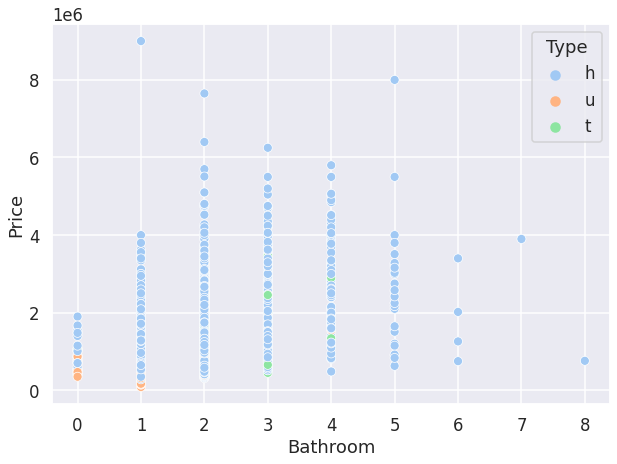

In [ ]:
fig = plt.figure(figsize=(10,7))
seaborn.scatterplot(x=melb_df_rooms['Bathroom'], 
                    y=melb_df_rooms['Price'], 
                    hue=melb_df_rooms['Type'])

In [ ]:
# Rooms y Bathroom, previo a la curación
Bathroom = melb_df_bathroom.Bathroom
Rooms = melb_df_rooms.Rooms
pandas.crosstab(Bathroom,Rooms)
# Todos tienen al menos un ambiente, se podría imputar con 1,
# o dependiendo la cantidad de habitaciones o categoría de tipo de casa.

Rooms,1,2,3,4,5
Bathroom,,,,,
1.0,674,3117,3250,452,17
2.0,6,504,2459,1720,260
3.0,0,8,153,469,244
4.0,0,0,5,41,47


**Conclusiones de Exploración y Curación Bathroom:**

En el caso de esta variable, identificamos datos atípicos en 0 que no tienen sentido empírico. Decidimos convertirlos a nulos para considerar luego de un análisis, la posible imputació (por ejemplo, colocar un baño a todos los que no tienen datos).

Analizando los gráficos y eliminando outliers, podemos concluir que no hay grandes cambios con respecto a la situacion original, ya que la mayoria de los datos se encuentran entre 1 y 2 baños antes y despues del analisis. Teniendo en cuenta esto, podemos concluir que la variable no aporta al analisis del precio, y decidimos eliminarla.    

##### **Car** (Numerica)

**Notar:** A diferencia de Rooms y Bathrooms, en esta variable el 0 si tiene sentido.

In [ ]:
print(melb_df['Car'].describe())
print(melb_df['Car'].value_counts())
print('Nulos: ',sum(melb_df['Car'].isna()))

count    13518.000000
mean         1.610075
std          0.962634
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Car, dtype: float64
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64
Nulos:  62


Text(0.5, 1.0, "Histograma 'Car'")

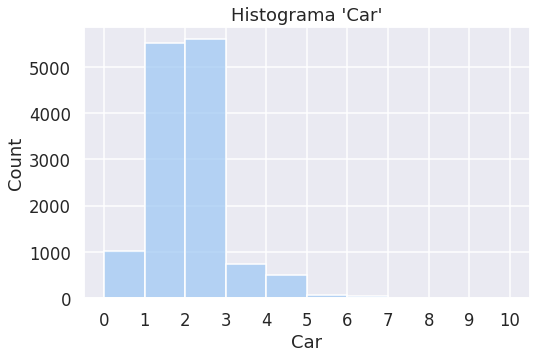

In [ ]:
# Histograma antes de eliminar outliers
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df['Car'], bins=range(0,11), weights=None, ax=ax)
ax.set_xticks(range(0,11))
ax.set_title("Histograma 'Car'")

Text(0.5, 1.0, "Distribucion de 'Car' segun Type")

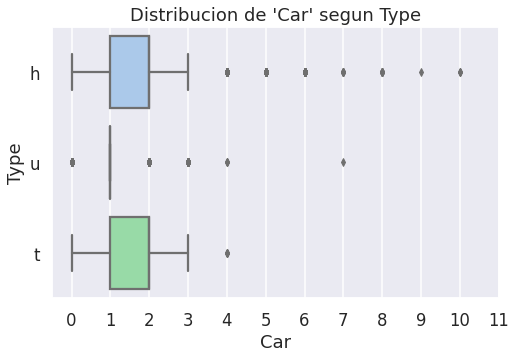

In [ ]:
# Rooms y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=melb_df,
    x='Car',
    y='Type',
    ax=ax)
ax.set_xticks(range(0,12))
ax.set_title("Distribucion de 'Car' segun Type")

In [ ]:
melb_df_car = melb_df
print('10% >', melb_df_car['Car'].quantile(.90))
print('5% >', melb_df_car['Car'].quantile(.95))
print('1% >', melb_df_car['Car'].quantile(.99))
print('0.5% >', melb_df_car['Car'].quantile(.995))

# Casos extremos
# 7      (6)
# 8       (8)
# 9       (1)
# 10       (3)

10% > 3.0
5% > 3.0
1% > 5.0
0.5% > 6.0


In [ ]:
melb_df_car = melb_df_car[melb_df_car["Car"] <=
                          melb_df_car["Car"].quantile(0.995)]

In [ ]:
print("Perdida de datos")
print("-----------------")
print("Con respecto al dataset original: ", "{:.2f}".format((1 - len(melb_df_car) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
-----------------
Con respecto al dataset original:  0.61% del dataset


Text(0.5, 1.0, "Histograma 'Car'")

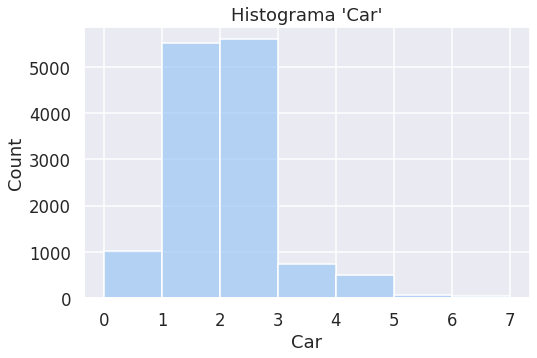

In [ ]:
# Histograma luego de eliminar outliers
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df_car['Car'], bins=range(0,8), weights=None, ax=ax)
ax.set_xticks(range(0,8))
ax.set_title("Histograma 'Car'")

In [ ]:
# Transformacion de variable Car de numerica a categorica ordinal
melb_carcat_df = melb_df

def func(row):
    if row['Car'] == 0: # 2 o mas lugares
        return 'No tiene'
    else:
        return 'Tiene cochera'
    
melb_carcat_df['Car_cat'] = melb_df.apply(func, axis=1).astype(str) # Categorizar

#print(melb_carcat_df['Car_cat'])

Text(0.5, 1.0, 'Diagrama de cajas del precio según si tiene o no cochera,\n y segun el tipo de vivienda')

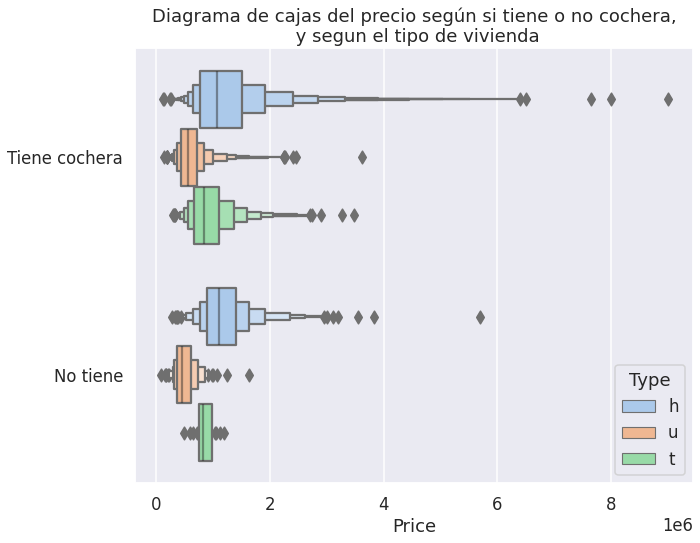

In [ ]:
fig = plt.figure(figsize=(10,8))
seaborn.boxenplot(data=melb_carcat_df, x='Price', y='Car_cat', hue='Type')
plt.ylabel("")
plt.title("Diagrama de cajas del precio según si tiene o no cochera,\n y segun el tipo de vivienda")

In [ ]:
melb_carcat_df.groupby('Car_cat')['Price'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Car_cat,,,,,,,,
No tiene,1026.0,1079088.0,513754.0,85000.0,760000.0,1001000.0,1325000.0,5700000.0
Tiene cochera,12554.0,1075406.0,648515.0,131000.0,644250.0,897000.0,1330000.0,9000000.0


In [ ]:
melb_carcat_df.groupby(['Car_cat', 'Type'])['Price'].describe().round()

count       mean  ...        75%        max
Car_cat       Type                     ...                      
No tiene      h      846.0  1193219.0  ...  1400000.0  5700000.0
              t       15.0   859073.0  ...   988000.0  1202000.0
              u      165.0   513907.0  ...   610000.0  1635000.0
Tiene cochera h     8603.0  1247527.0  ...  1510000.0  9000000.0
              t     1099.0   934754.0  ...  1105000.0  3475000.0
              u     2852.0   610405.0  ...   713875.0  3625000.0

[6 rows x 8 columns]

In [ ]:
melb_h_df = melb_carcat_df[melb_carcat_df['Type'] == 'h'].groupby(['Car_cat', 'Type', 'Regionname'])['Price'].describe().round()
melb_h_df

count  ...        max
Car_cat       Type Regionname                          ...           
No tiene      h    Eastern Metropolitan          61.0  ...  2530000.0
                   Eastern Victoria               3.0  ...   655000.0
                   Northern Metropolitan        376.0  ...  3200000.0
                   Northern Victoria              4.0  ...   621000.0
                   South-Eastern Metropolitan     6.0  ...   985000.0
                   Southern Metropolitan        223.0  ...  5700000.0
                   Western Metropolitan         172.0  ...  2910000.0
                   Western Victoria               1.0  ...   283000.0
Tiene cochera h    Eastern Metropolitan        1112.0  ...  4000000.0
                   Eastern Victoria              47.0  ...  1085000.0
                   Northern Metropolitan       2378.0  ...  4525000.0
                   Northern Victoria             37.0  ...  1355000.0
                   South-Eastern Metropolitan   382.0  ...  9000000.0
                   Southern Metropolitan       2498.0  ...  8000000.0
                   Western Metropolitan        2118.0  ...  3900000.0
                   Western Victoria              31.0  ...   710000.0

[16 rows x 8 columns]

Text(0.5, 1.0, "Mediana de los precios de las propiedades de Type 'h',\n para cada region, diferenciada entre las que tienen y no tienen cochera\n")

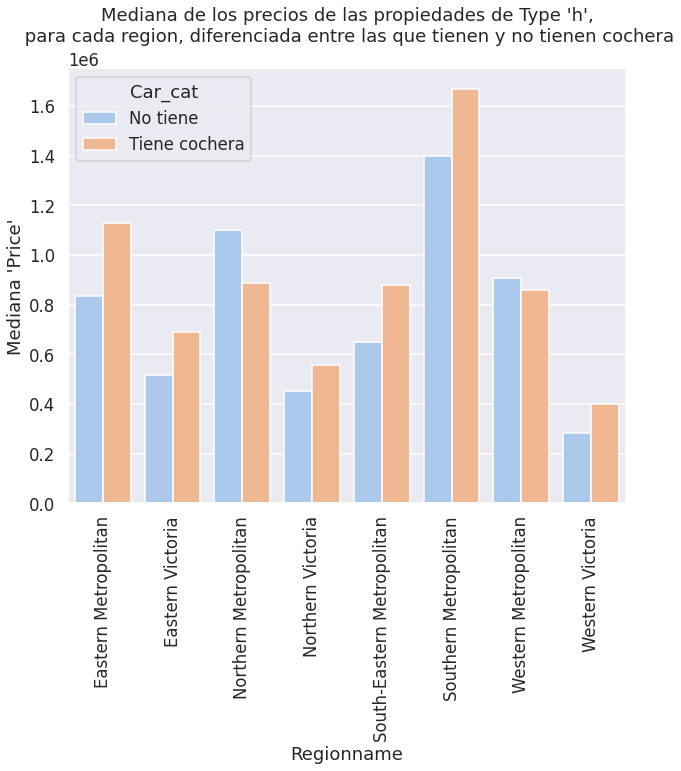

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
seaborn.barplot(data=melb_h_df.reset_index(),
                x='Regionname',
                y='50%',
                hue='Car_cat'
                )
plt.xticks(rotation=90)
plt.ylabel("Mediana 'Price'")
plt.title("Mediana de los precios de las propiedades de Type 'h',\n para cada region, diferenciada entre las que tienen y no tienen cochera\n")

**Conclusiones de Exploración y Curación de Car**:

La variable 'Car' tiene 62 datos nulos, y datos atípicos en el extremo superior.
Sin curar los datos, vemos que la mayoría de las propiedades tiene entre una y dos cocheras; sin embargo, hay propiedades sin cocheras, o con más de 3 cocheras, estos últimos con menores frecuencias. Al analizar Car en relación a Type, el comportamiento es parecido al de la columna Bathroom, lo cual fue descrito anteriormente.

Al analizar los cuantiles de la variable 'Car', vemos que el 99,5% de los datos tienen menos de 6 cocheras. Por ende, excluimos los outliers superiores al percentil 0.995. Al hacer esto, sólo descartamos un 0.61% del total del dataset. Luego de eliminar estos datos atípicos, transformamos el tipo de variable de numérica a categórica para poder profundizar nuestro análisis. Esta categorización la realizamos de una manera amplia teniendo en cuenta que estamos en una etapa de exploración: definimos dos categorías, si la vivienda tiene o no tiene cochera.

Con esta nueva variable, buscamos ver si existe relación entre el precio de la propiedad y el hecho de contar o no con cochera. Generamos un boxplot del precio separándolo de esta manera, y por tipo de propiedad. Como la variable Price todavía no fue curada, sus valores extremos nos dificultan su visualización y realizamos su estadística descriptiva hasta ese momento.

En las tablas vemos, en una primera instancia, que las propiedades SIN COCHERA del dataset tienen una mediana de precio superior a las propiedades CON COCHERA, lo cual nos llamó la atención. Seguimos explorando, incorporando a la tabla de estadísticas descriptivas una apertura por tipo de propiedad "Type". Observamos un comportamiento esperado para las tipologías 't' y 'u', en donde tendrían menos precio las que NO tienen cochera. Sin embargo, en la tipología 'h' sucede lo contrario. 

Para terminar este análisis, consideramos únicamente la tipología 'h', y volvimos a hacer una apertura por regiones, intentando buscar su explicación. Representamos el resultado graficando la mediana del precio de las propiedades, discriminando por regiones, y subdividiendo por la nueva categoría 'tiene cochera' o 'no tiene'. Del mismo se observa que en la mayoria de las regiones ocurre lo esperado: El precio de las viviendas 'h' CON COCHERA cochera es mayor que el precio de las SIN COCHERA -excepto para las viviendas 'h' de las regiones 'Nothern Metropolitan' y 'Western Metropolitan'-.

Seguimos esta línea de análisis a la hora de explorar las proximas variables. Dadas las conclusiones del mismo, vemos que la variable 'Car' nos brinda información útil, y creemos que se relaciona con el resto de las variables. Considerando que es una variable con nulos presentes, sería necesario imputarlos para análisis y procesos posteriores. La decisión del método de imputacion se hará luego del analisis del resto de las variables (ver Ejercicio 2.2 - Imputación).

##### **Landsize** (Numerica)

In [ ]:
print(melb_df['Landsize'].describe())
print('Nulos: ',sum(melb_df['Landsize'].isna()))
print('0s: ',sum(melb_df['Landsize'] == 0)) # No tiene sentido esta variable en 0

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64
Nulos:  0
0s:  1939


En esta variable tenemos outliers presentes en ambos extremos

In [ ]:
print('0.5% <', melb_df['Landsize'].quantile(.005))
print('1% <', melb_df['Landsize'].quantile(.01))
print('5% <', melb_df['Landsize'].quantile(.05))
print('10% <', melb_df['Landsize'].quantile(.1))
print('10% >', melb_df['Landsize'].quantile(.90))
print('5% >', melb_df['Landsize'].quantile(.95))
print('1% >', melb_df['Landsize'].quantile(.99))
print('0.5% >', melb_df['Landsize'].quantile(.995))

0.5% < 0.0
1% < 0.0
5% < 0.0
10% < 0.0
10% > 802.0
5% > 995.0
1% > 2959.82999999998
0.5% > 4683.409999999982


In [ ]:
melb_df['Landsize'][0:10]

0    202.0
1    156.0
2    134.0
3     94.0
4    120.0
5    181.0
6    245.0
7    256.0
8      0.0
9    220.0
Name: Landsize, dtype: float64

In [ ]:
melb_df[melb_df['Landsize']> 433013]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_cat
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0,Tiene cochera


In [ ]:
land_melb_df = melb_df[(melb_df["Landsize"] <= melb_df["Landsize"].quantile(0.99))]

Text(0.5, 1.0, "Distribucion de 'Landsize' segun Type")

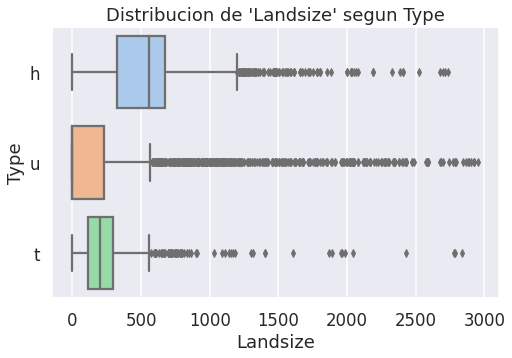

In [ ]:
# Rooms y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=land_melb_df,
    x='Landsize',
    y='Type',
    ax=ax)
#ax.set_xticks(range(0,12))
ax.set_title("Distribucion de 'Landsize' segun Type")

In [ ]:
#land_melb_df['Landsize'] = pandas.to_numeric(land_melb_df['Landsize'], errors='coerce')
#land_melb_df.loc[land_melb_df['Landsize']==0, 'Landsize'] = numpy.nan
land_melb_df['Landsize'] = melb_df['Landsize'].replace(0, numpy.nan)

Text(0.5, 1.0, "Histograma 'Landsize'")

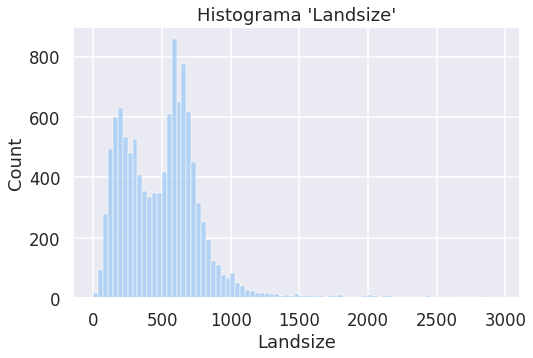

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(land_melb_df['Landsize'], ax=ax)
ax.set_title("Histograma 'Landsize'")

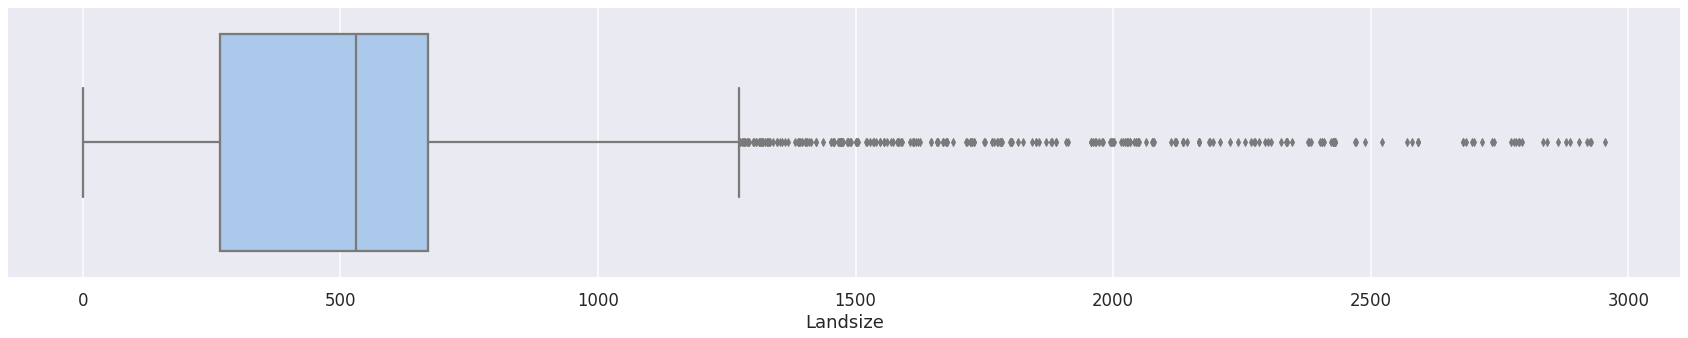

In [ ]:
plt.figure(figsize=(30, 5))
seaborn.boxplot(x=land_melb_df['Landsize'])

In [ ]:
len(land_melb_df[land_melb_df['Landsize']>1250]) # 221 valores

274

In [ ]:
len(land_melb_df[land_melb_df['Landsize']<100]) # 221 valores

309

**Conclusiones de Exploración y Curación de Landsize**:


- No tenía originalmente valores faltantes, pero se encontraron 1939 (14.47%) de casos con Landsize = 0. Se decide imputarlos más adelante, por lo que se reemplazan en esta sección los valores 0 por NaN (Ver Ejercicio 2.2 - Imputación).
- Hay un valor muy extremo: 433014.000000 (un sólo caso), que se decide eliminar.
- Hay casos con poca superficie. 309 registros con menos de 100m2. Vemos que son en su mayoría las propiedades de tipo 'U', por lo tanto se dejan en el dataset.


##### **Price** (Numerica)

In [ ]:
print(melb_df['Price'].describe().round())
print('Nulos: ',sum(melb_df['Price'].isna()))
print('0s: ',sum(melb_df['Price'] == 0)) # No tiene sentido esta variable en 0

count      13580.0
mean     1075684.0
std       639311.0
min        85000.0
25%       650000.0
50%       903000.0
75%      1330000.0
max      9000000.0
Name: Price, dtype: float64
Nulos:  0
0s:  0


Esta variable tiene outliers en ambos extremos

In [ ]:
print('0.5% <', melb_df['Price'].quantile(.005))
print('1% <', melb_df['Price'].quantile(.01))
print('5% <', melb_df['Price'].quantile(.05))
print('10% <', melb_df['Price'].quantile(.1))
print('10% >', melb_df['Price'].quantile(.90))
print('5% >', melb_df['Price'].quantile(.95))
print('1% >', melb_df['Price'].quantile(.99))
print('0.5% >', melb_df['Price'].quantile(.995))
print('0.5% >', melb_df['Price'].quantile(.9999))


0.5% < 270000.0
1% < 300000.0
5% < 405000.0
10% < 480000.0
10% > 1850000.0
5% > 2290049.999999999
1% > 3338149.999999987
0.5% > 3900000.0
0.5% > 7874734.999999691


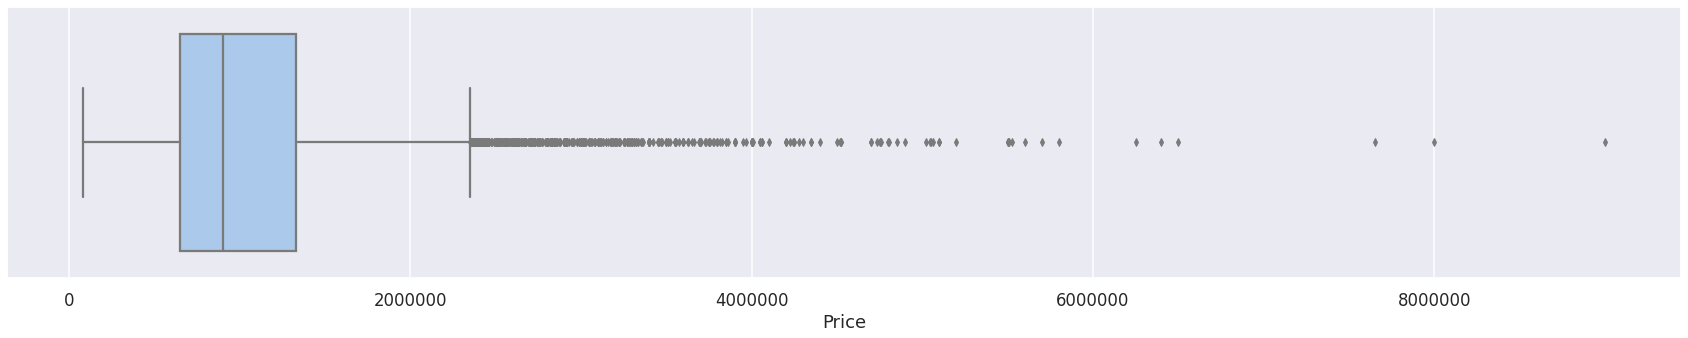

In [ ]:
plt.figure(figsize=(30, 5))
seaborn.boxplot(x=melb_df['Price'])
plt.ticklabel_format(style='plain', axis='x')

Text(0.5, 1.0, "Distribucion de 'Price' segun Type")

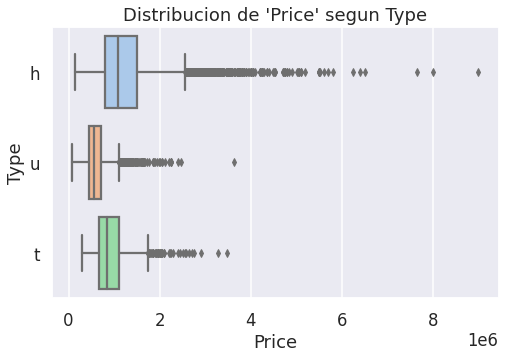

In [ ]:
# Price y Type, previo a la curación
fig, ax = plt.subplots(figsize=(8,5))
seaborn.boxplot(
    data=melb_df,
    x='Price',
    y='Type',
    ax=ax)
ax.set_title("Distribucion de 'Price' segun Type")

In [ ]:
price_melb_df = melb_df[melb_df["Price"] <= melb_df["Price"].quantile(0.9999)] # 7874734

In [ ]:
len(melb_df[melb_df['Price']>7874734])

2

Text(0.5, 1.0, "Histograma 'Price'")

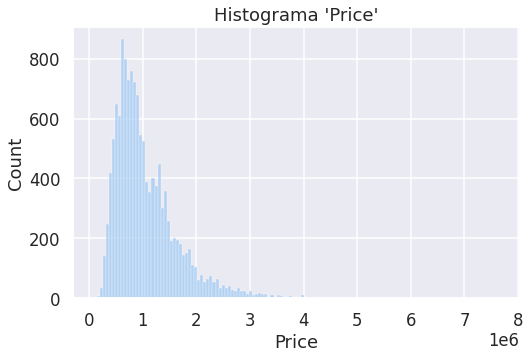

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(price_melb_df['Price'], ax=ax)
ax.set_title("Histograma 'Price'")

In [ ]:
len(price_melb_df)

13578

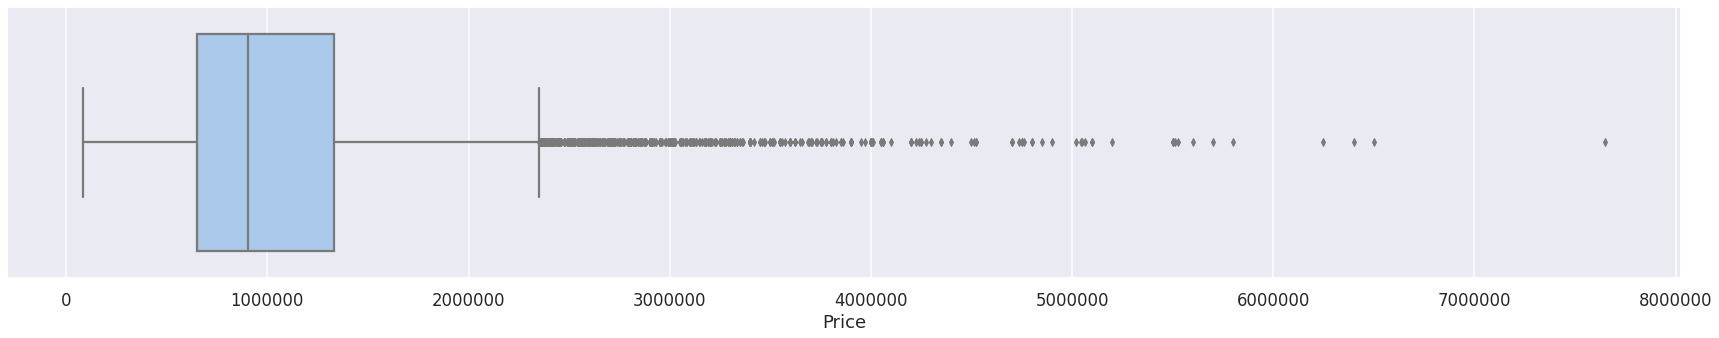

In [ ]:
plt.figure(figsize=(30, 5))
seaborn.boxplot(x=price_melb_df['Price'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
print("Perdida de datos")
print("-----------------")
print("Con respecto al dataset original: ", "{:.2f}".format((1 - len(price_melb_df) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
-----------------
Con respecto al dataset original:  0.01% del dataset


**Conclusiones de Exploración y Curación de Price**:

- Esta es la variable objetivo: se quiere predecir su comportamiento. 
- No tiene nulos ni ceros, sólo tiene valores atípicos en el extremo superior. 
- Observamos el precio por tipo de propiedad y notamos que la tipología 'u' es la de menor mediana y la 'h' es la de mayor mediana y a su vez es la que registra la mayor cantidad de valores atípicos superiores.
- Decidimos eliminar sólo los valores superiores al cuantil 0.9999 (son sólo dos registros muy extremos). Consideramos que es importante conservar en general los precios altos, para respetar en mayor medida la representación de casos. Sobre todo teniendo en cuenta su potencial uso en un modelo de machine learning, y el objetivo de predicción de su valor.

##### **Building Area** (Numérica)

In [ ]:
print(melb_df['BuildingArea'].describe().round())
print('Nulos: ',sum(melb_df['BuildingArea'].isna()))
print('0s: ',sum(melb_df['BuildingArea'] == 0)) # No tiene sentido esta variable en 0

count     7130.0
mean       152.0
std        541.0
min          0.0
25%         93.0
50%        126.0
75%        174.0
max      44515.0
Name: BuildingArea, dtype: float64
Nulos:  6450
0s:  17


In [ ]:
melb_df.loc[melb_df['BuildingArea']==0, 'BuildingArea'] = numpy.nan

In [ ]:
sum(melb_df['BuildingArea'].isna())/len(melb_df)*100

47.62150220913107

Cerca del 47.5% de los datos de esta variable son nulos.

In [ ]:
# Casos raros: Veamos si BuildingArea siempre es menor que Landsize
melb_df[melb_df['BuildingArea']>melb_df['Landsize']]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_cat
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,No tiene
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,Tiene cochera
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,Tiene cochera
23,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,18/06/2016,2.5,3067.0,2.0,1.0,1.0,0.0,60.0,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019.0,Tiene cochera
24,Abbotsford,52a William St,2,h,1100000.0,PI,Biggin,18/06/2016,2.5,3067.0,2.0,2.0,1.0,124.0,135.0,2013.0,Yarra,-37.80790,144.99770,Northern Metropolitan,4019.0,Tiene cochera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0,Tiene cochera
13267,Prahran,7 MacKay St,3,t,1463000.0,S,Jellis,23/09/2017,4.6,3181.0,3.0,2.0,2.0,15.0,147.0,1998.0,NaN,-37.84969,145.00057,Southern Metropolitan,7717.0,Tiene cochera
13287,Sandringham,4/388 Bluff Rd,4,t,1050000.0,VB,hockingstuart,23/09/2017,15.2,3191.0,4.0,2.0,1.0,173.0,184.0,2010.0,NaN,-37.94723,145.02268,Southern Metropolitan,4497.0,Tiene cochera
13297,St Kilda,4 Frampton St,2,h,1000000.0,VB,Marshall,23/09/2017,5.0,3182.0,2.0,1.0,NaN,106.0,134.0,1900.0,NaN,-37.86191,144.98655,Southern Metropolitan,13240.0,Tiene cochera


Buscamos outliers en ambos extremos

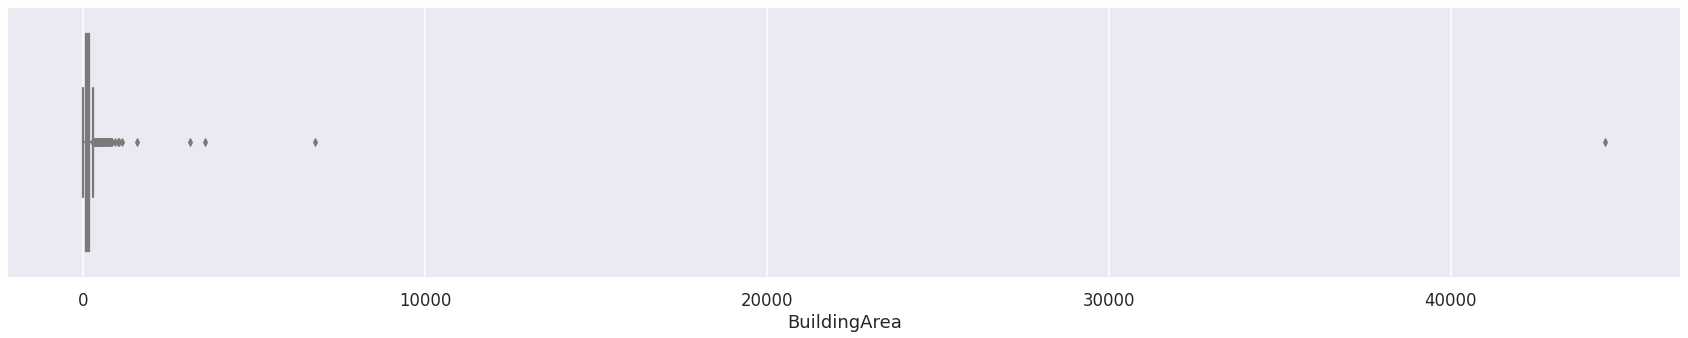

In [ ]:
plt.figure(figsize=(30, 5))
seaborn.boxplot(x=price_melb_df['BuildingArea'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
print('0.5% <', melb_df['BuildingArea'].quantile(.005))
print('1% <', melb_df['BuildingArea'].quantile(.01))
print('5% <', melb_df['BuildingArea'].quantile(.05))
print('10% <', melb_df['BuildingArea'].quantile(.1))
print('10% >', melb_df['BuildingArea'].quantile(.90))
print('5% >', melb_df['BuildingArea'].quantile(.95))
print('1% >', melb_df['BuildingArea'].quantile(.99))
print('0.5% >', melb_df['BuildingArea'].quantile(.995))
print('0.00001% >', melb_df['BuildingArea'].quantile(.999, interpolation='nearest'))

0.5% < 3.0
1% < 18.0
5% < 52.0
10% < 67.0
10% > 240.0
5% > 294.39999999999964
1% > 466.7600000000002
0.5% > 579.399999999996
0.00001% > 1022.0


In [ ]:
build_melb_df = melb_df[(melb_df["BuildingArea"] >= melb_df["BuildingArea"].quantile(0.01)) | (melb_df["BuildingArea"].isna())]
build_melb_df = build_melb_df[(build_melb_df["BuildingArea"] <= build_melb_df["BuildingArea"].quantile(0.995)) | (melb_df["BuildingArea"].isna())]

Text(0.5, 1.0, "Histograma 'BuildingArea'")

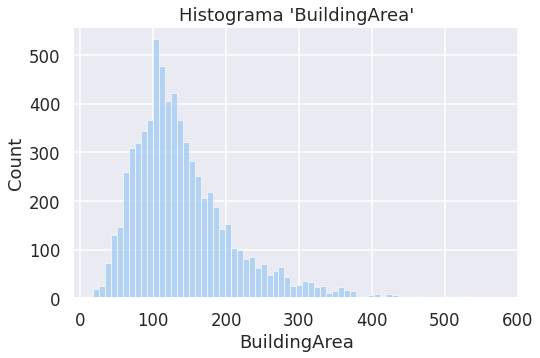

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(build_melb_df['BuildingArea'], ax=ax)
ax.set_title("Histograma 'BuildingArea'")

In [ ]:
print("Perdida de datos")
print("-----------------")
print("Con respecto al dataset original: ", "{:.2f}".format((1 - len(build_melb_df) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
-----------------
Con respecto al dataset original:  0.76% del dataset


**Conclusiones de Exploración y Curación de Building Area**:

- Esta variable tiene un valor atípico superior extremo (igual a 44515) que decidimos eliminar porque está distanciado en una magnitud muy grande del resto de los valores  (representa el 0.00001%).
- También tiene 17 casos con valor cero que reemplazamos por NaN para poder imputarlos en caso de conservar la variable.
- El mayor problema de esta variable es que tiene una gran cantidad de valores faltantes (47.62%). El dilema que enfrentamos es si conservamos la variable imputando los valores nulos, o si la eliminamos.
Como no tenemos herramientas en este punto para decidir si un modelo de predicción será mejor incluyendo ésta variable imputada o eliminándola, se decide eliminar la variable.
(Luego en el entregable parte 2 "se la recupera" o agrega al dataset, para poder imputarla con el método KNN, ya que se solicita explícitamente).

##### **Distance** (Numérica)

In [ ]:
print(melb_df['Distance'].describe().round())
print('Nulos: ',sum(melb_df['Distance'].isna()))
print('0s: ',sum(melb_df['Distance'] == 0)) 
# Tiene sentido en 0. Si, cuando estás en el centro.

count    13580.0
mean        10.0
std          6.0
min          0.0
25%          6.0
50%          9.0
75%         13.0
max         48.0
Name: Distance, dtype: float64
Nulos:  0
0s:  6


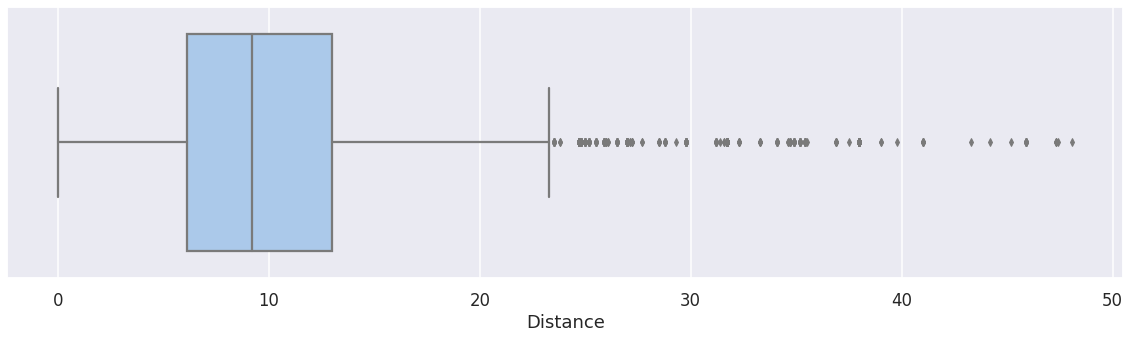

In [ ]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=melb_df['Distance'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
print('0.5% <', melb_df['Distance'].quantile(.005))
print('1% <', melb_df['Distance'].quantile(.01))
print('5% <', melb_df['Distance'].quantile(.05))
print('10% <', melb_df['Distance'].quantile(.1))
print('10% >', melb_df['Distance'].quantile(.90))
print('5% >', melb_df['Distance'].quantile(.95))
print('1% >', melb_df['Distance'].quantile(.99))
print('0.5% >', melb_df['Distance'].quantile(.995))

0.5% < 1.5
1% < 1.6
5% < 2.6
10% < 3.5
10% > 16.2
5% > 20.6
1% > 32.3
0.5% > 36.9


Text(0.5, 1.0, "Histograma 'Distance'")

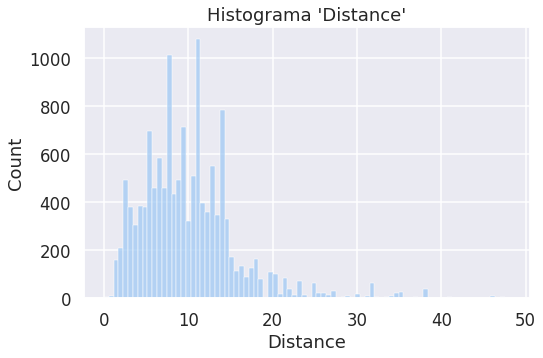

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
seaborn.histplot(melb_df['Distance'], ax=ax)
ax.set_title("Histograma 'Distance'")

In [ ]:
# Transformacion de variable Car de numerica a categorica ordinal (codificada)

melb_distcat_df = melb_df

def func(row):
    if row['Distance'] < 10:
        return '< 10km'
    elif row['Distance'] < 20: 
        return '< 20km' 
    elif row['Distance'] < 30: 
        return '< 30km' 
    elif row['Distance'] >= 30: 
        return '>= 30km'    
melb_distcat_df['dist_cat'] = melb_df.apply(func, axis=1).astype(str) # Categorizar

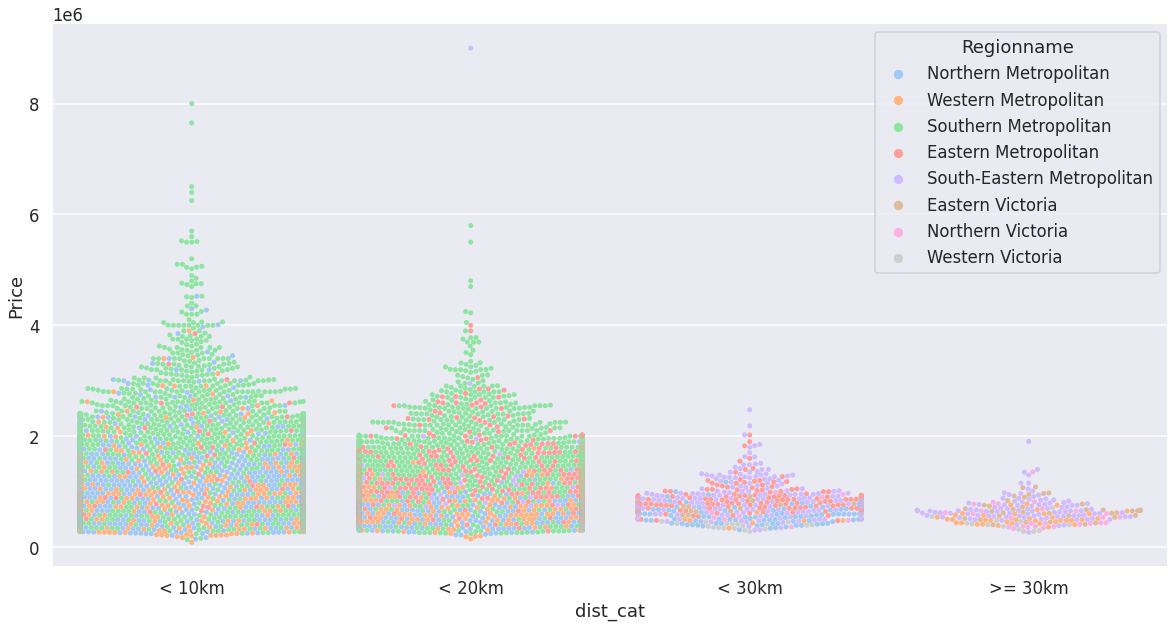

In [ ]:
fig = plt.figure(figsize=(20,10))
seaborn.swarmplot(x=melb_distcat_df['dist_cat'], 
                    y=melb_distcat_df['Price'], 
                    hue=melb_distcat_df['Regionname'])

In [ ]:
melb_distcat_df['dist_cat'].value_counts()

< 10km     7334
< 20km     5489
< 30km      544
>= 30km     213
Name: dist_cat, dtype: int64

**Conclusiones de Exploración y Curación de ‘Distance’ (distancia al centro de Melbourne)**:

- Esta variable no tiene casos nulos, y los ceros son posibles empíricamente (propiedades que están en el centro). 
-Realizamos un tratamiento similar al de la variable Price, en tanto observamos que si bien tiene datos atípicos en el extremo superior, consideramos que no debemos eliminarlos porque pueden estar representando situaciones reales aunque menos frecuentes (propiedades más lejos del centro, > a 22 km). Se analizan algunas latitudes y longitudes en Google Earth y se visualiza que están a más de 22 km del centro pero dentro de Melbourne. 
- En el gráfico 'swarmplot' relacionamos precio con distancia al centro y región. Como vimos en análisis anteriores, las regiones más cercanas al centro son las que tienen mayor precio, y a medida que nos alejamos del centro, no sólo cambia la región, si no que disminuye el precio.
- Se decide conservar la variable sin modificaciones, porque tiene relación con el precio de la propiedad (coherente con lo esperado).

##### **Regionname** (Categorica Nominal)

In [ ]:
sum(melb_df['Regionname'].isna())

0

In [ ]:
melb_df.Regionname.describe()

count                     13580
unique                        8
top       Southern Metropolitan
freq                       4695
Name: Regionname, dtype: object

In [ ]:
melb_df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

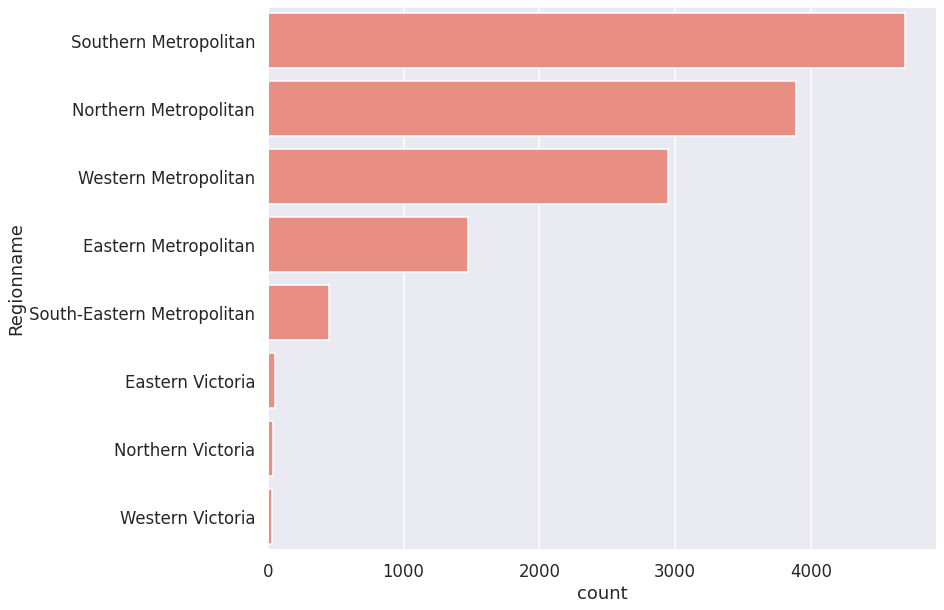

In [ ]:
plt.figure(figsize=(12, 10))
seaborn.countplot(data=melb_df, y='Regionname', \
                  order=melb_df['Regionname'].value_counts().index,
                  color='salmon')

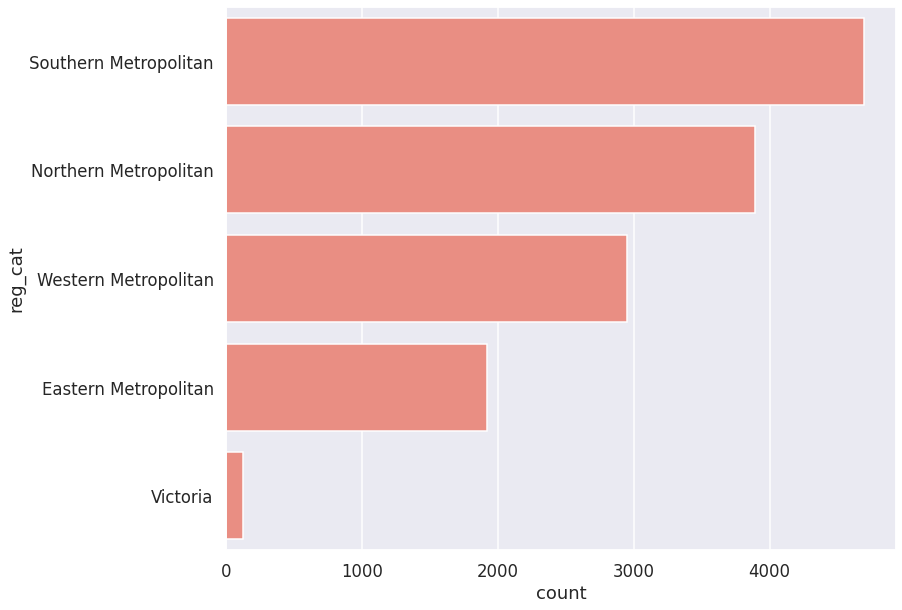

In [ ]:
# Reagrupacion de Reggionname

melb_regcat_df = melb_df

def func(row):
    if row['Regionname'] in ['Eastern Victoria', 'Northern Victoria', 'Western Victoria']:
        return 'Victoria'
    elif row['Regionname'] in ['Eastern Metropolitan', 'South-Eastern Metropolitan']: 
        return "Eastern Metropolitan" 
    else:
        return row['Regionname']    

melb_regcat_df['reg_cat'] = melb_df.apply(func, axis=1).astype(str) # Categorizar

plt.figure(figsize=(12, 10))
seaborn.countplot(data=melb_regcat_df, y='reg_cat', \
                  order=melb_regcat_df['reg_cat'].value_counts().index,
                  color='salmon')

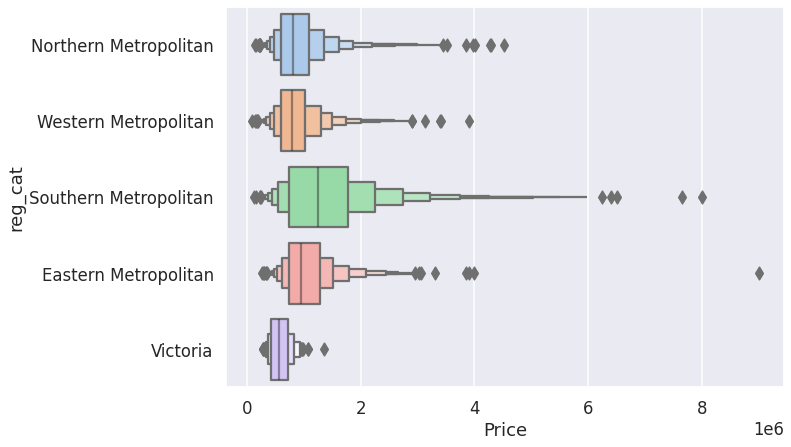

In [ ]:
figure = plt.figure(figsize=(10,7))
seaborn.boxenplot(data=melb_regcat_df, x='Price', y='reg_cat')

**Conclusiones de Exploración y Curación de Regionname**:

La variable Regionname no tiene valores nulos, y está formada por ocho categorías. A grandes rasgos, las propiedades se dividen entre regiones de “Metropolitan” y de “Victoria”, y éstas a su vez están divididas según algunos puntos cardinales. Las regiones alusivas a “Victoria” cuentan con muy pocos casos, motivo por el cual las reagrupamos en “Victoria”. También agrupamos las categorías Eastern Metropolitan y South-Eastern Metropolitan en “Eastern Metropolitan”.

En el gráfico boxenplot observamos que existe una relación entre el precio y las regiones. Este gráfico y los analisis anteriores en los que combinamos otras variables con las regiones, nos permiten concluir que es importante mantenerla para predecir el precio de las propiedades.

##### **Council Area** (Categorica Nominal)

In [ ]:
melb_df['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

In [ ]:
sub_sin_council = melb_df[melb_df['CouncilArea'].isna()]['Suburb'].unique()

In [ ]:
sum(melb_df['CouncilArea'].isna())

1369

In [ ]:
sum(melb_df['CouncilArea'].isna())/len(melb_df)*100

10.08100147275405

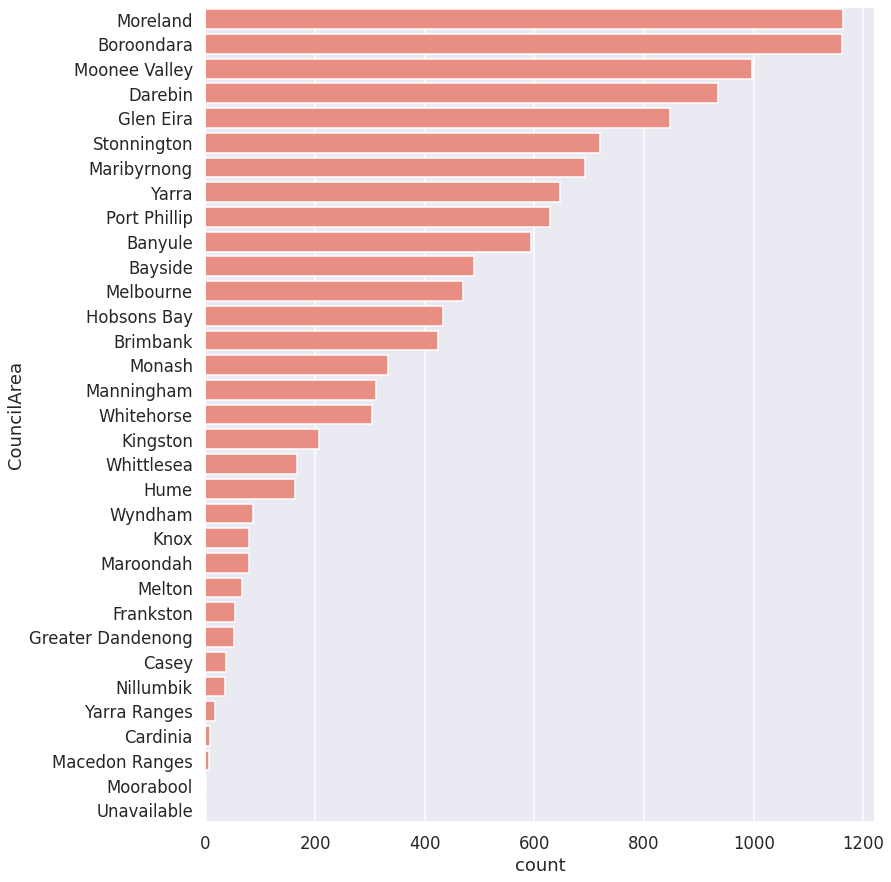

In [ ]:
plt.figure(figsize=(12, 15))
seaborn.countplot(data=melb_df, y='CouncilArea', \
                  order=melb_df['CouncilArea'].value_counts().index,
                  color='salmon')

In [ ]:
council_means = melb_regcat_df.groupby(['reg_cat','CouncilArea'])['Price'].describe().round().reset_index().sort_values('mean', ascending=False)
council_means

,reg_cat,CouncilArea,count,mean,std,min,25%,50%,75%,max
1,Eastern Metropolitan,Boroondara,1.0,2200000.0,NaN,2200000.0,2200000.0,2200000.0,2200000.0,2200000.0
21,Southern Metropolitan,Bayside,489.0,1652168.0,792108.0,290000.0,1037000.0,1550000.0,2050000.0,5800000.0
22,Southern Metropolitan,Boroondara,1159.0,1646740.0,923595.0,160000.0,833000.0,1615000.0,2118500.0,8000000.0
29,Southern Metropolitan,Unavailable,1.0,1325000.0,NaN,1325000.0,1325000.0,1325000.0,1325000.0,1325000.0
30,Southern Metropolitan,Whitehorse,111.0,1297237.0,483700.0,550000.0,867500.0,1253500.0,1646000.0,2630000.0
28,Southern Metropolitan,Stonnington,719.0,1293382.0,952430.0,240000.0,584500.0,1020000.0,1700000.0,6250000.0
9,Eastern Metropolitan,Monash,146.0,1266643.0,770328.0,572000.0,939125.0,1150000.0,1407500.0,9000000.0
7,Eastern Metropolitan,Manningham,310.0,1236242.0,360172.0,400000.0,990000.0,1221000.0,1400750.0,2705000.0
11,Eastern Metropolitan,Whitehorse,193.0,1197974.0,561472.0,288000.0,820000.0,1075000.0,1430000.0,4000000.0
27,Southern Metropolitan,Port Phillip,628.0,1144346.0,777268.0,275000.0,559000.0,920000.0,1550000.0,5600000.0


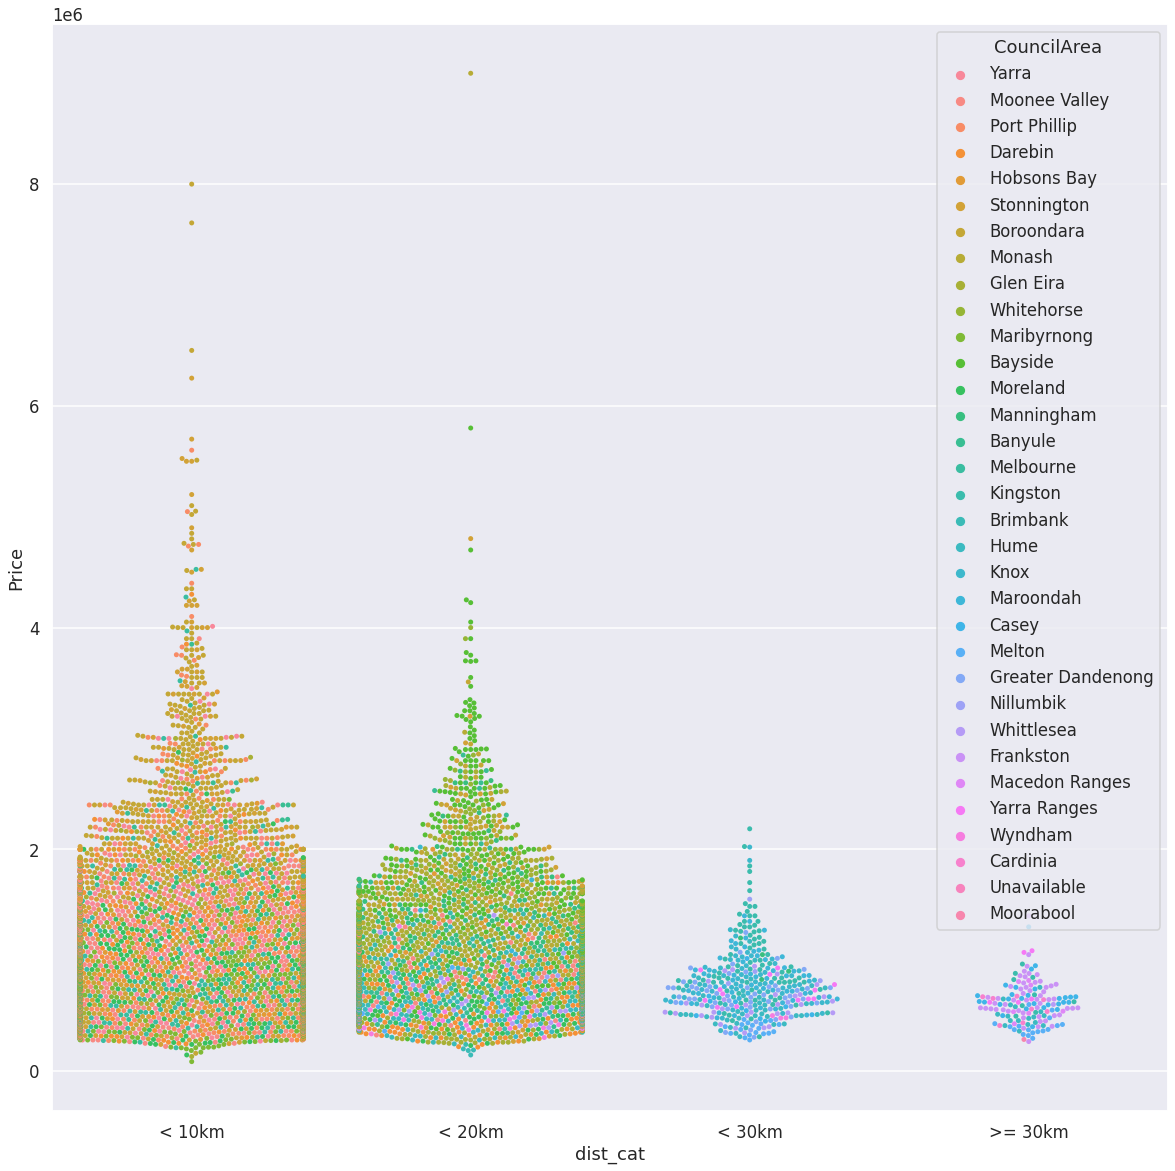

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
seaborn.swarmplot(x=melb_distcat_df['dist_cat'], 
                    y=melb_distcat_df['Price'], 
                    hue=melb_distcat_df['CouncilArea'])

**Conclusiones de Exploración y Curación de Council Area**:

Esta variable tiene 1369 (10.08%) de casos nulos. Tiene 33 categorias distintas, lo cual puede dificultar su interpretación. Asi como Regionname o Suburb, se trata de una variable geografica. 

Combinamos esta variable con el precio y la distancia al centro, y observamos que la distancia está captando la información de la variable CouncilArea (habría una relación entre las variables geograficas y el precio). 

Como ya tenemos seleccionadas las variables Regionname y Distance, decidimos descartarla para el analisis de prediccion de precio. Sin embargo, quedará en el dataframe para imputar sus valores faltantes en una próxima instancia de trabajo (esto se solicita en el ejercicio 2 de Imputación). 

##### **Suburb** (Caterogica Nominal)

In [ ]:
sum(melb_df['Suburb'].isna())

0

In [ ]:
melb_df.Suburb.describe()

count         13580
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

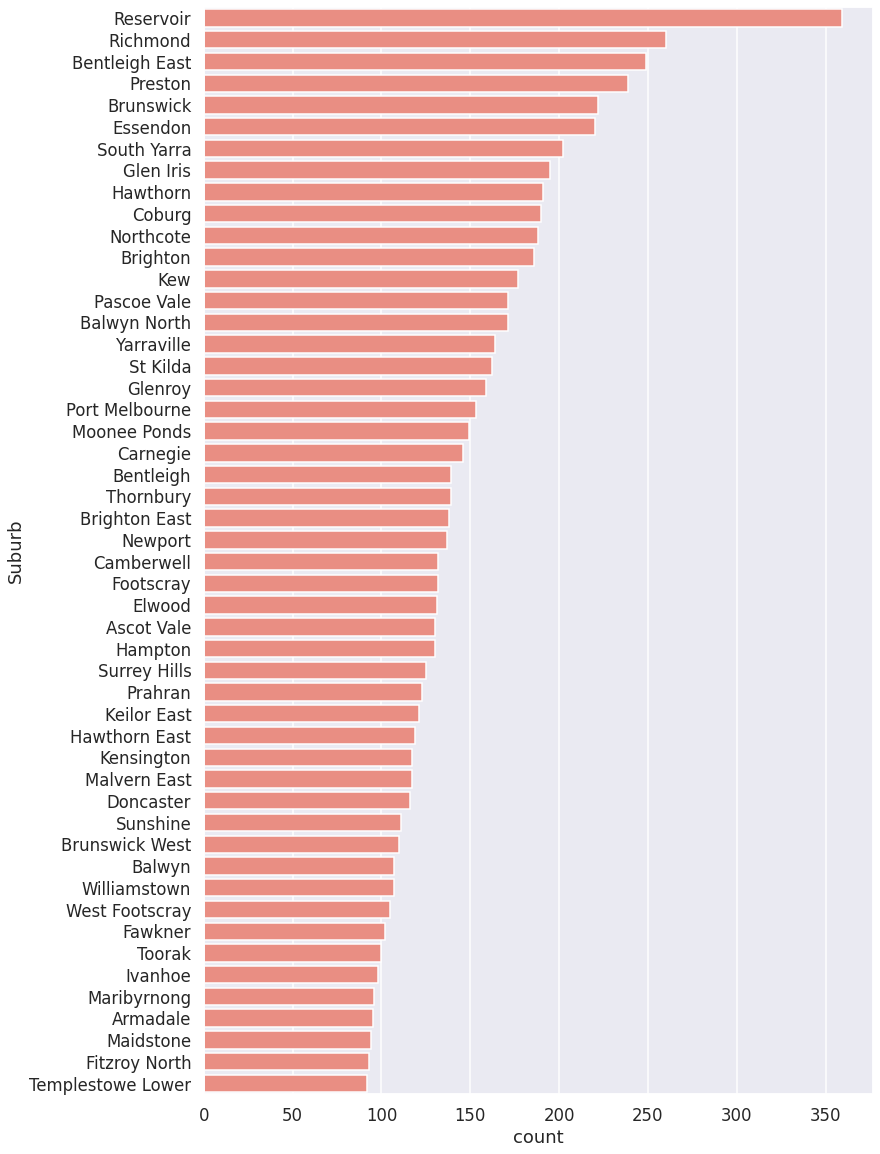

In [ ]:
# Nos quedamos (para graficar) con los 50 Suburbios con más casos
sub_elf_df = melb_df[melb_df.Suburb. \
                     isin(melb_df['Suburb'].value_counts().index[0:50])]

plt.figure(figsize=(12, 20))
seaborn.countplot(data=sub_elf_df, y='Suburb', \
                  order=sub_elf_df.Suburb.value_counts().index,
                  color='salmon')

In [ ]:
melb_df['Suburb'].value_counts(ascending=True)

Bacchus Marsh       1
New Gisborne        1
Yarra Glen          1
Riddells Creek      1
Croydon South       1
                 ... 
Brunswick         222
Preston           239
Bentleigh East    249
Richmond          260
Reservoir         359
Name: Suburb, Length: 314, dtype: int64

In [ ]:
melb_df['Suburb'].value_counts()[melb_df['Suburb'].value_counts()< 10]

Brooklyn          9
Wollert           9
Caulfield East    9
Springvale        9
Ripponlea         9
                 ..
Croydon South     1
Riddells Creek    1
Yarra Glen        1
New Gisborne      1
Bacchus Marsh     1
Name: Suburb, Length: 102, dtype: int64

**Reagrupamiento de la variable "Suburb" en una nueva columna categórica**

Se calculará la mediana de precios de las casas por Suburbio (tendremos 314 valores de mediana).
Para ese listado de mediana de precios se calcularán 10 intervalos de precios (bins).
Y luego en el dataset melb_df se agregará una nueva columna "Suburb_cat", donde se le asociará a cada vivienda (a cada fila), el "suburbio group" correspondiente de acuerdo a la mediana de precio de ese suburbio.



```
{Interval(284999.0, 548375.0, closed='right'): 'Suburb_group1',
 Interval(548375.0, 611200.0, closed='right'): 'Suburb_group2',
 Interval(611200.0, 667750.0, closed='right'): 'Suburb_group3',
 Interval(667750.0, 750200.0, closed='right'): 'Suburb_group4',
 Interval(750200.0, 818750.0, closed='right'): 'Suburb_group5',
 Interval(818750.0, 910200.0, closed='right'): 'Suburb_group6',
 Interval(910200.0, 1000550.0, closed='right'): 'Suburb_group7',
 Interval(1000550.0, 1154000.0, closed='right'): 'Suburb_group8',
 Interval(1154000.0, 1353500.0, closed='right'): 'Suburb_group9',
 Interval(1353500.0, 2185000.0, closed='right'): 'Suburb_group10'}
```



In [ ]:
#Create grouped df with median price by suburb
price_melb_df_mean_grouped = melb_df[['Suburb','Price']].groupby('Suburb').median().round()
price_melb_df_mean_grouped[:10]

,Price
Suburb,
Abbotsford,1093500.0
Aberfeldie,1300000.0
Airport West,755000.0
Albanvale,540750.0
Albert Park,1900000.0
Albion,613000.0
Alphington,1516000.0
Altona,773500.0
Altona Meadows,685000.0


In [ ]:
len(price_melb_df_mean_grouped) # Tenemos 311 suburbs (en vez de 314) porque se hizo sobre el dataset melb_df=price_melb_df

314

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000., 2500000.]),
 <a list of 11 Text major ticklabel objects>)

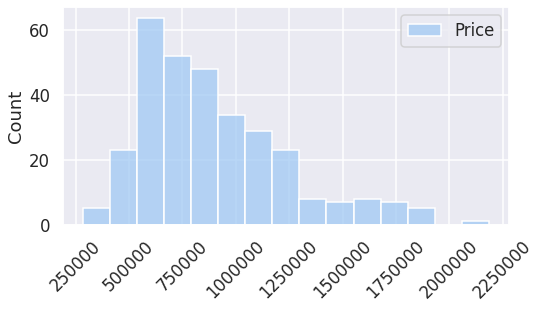

In [ ]:
# Distribución de la mediana de precios por suburbio.
fig = plt.figure(figsize=(8, 4))
seaborn.histplot(price_melb_df_mean_grouped)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

In [ ]:
# Add bins column for each median/suburb
price_melb_df_mean_grouped['new_suburbs_bins'] = pandas.qcut(price_melb_df_mean_grouped['Price'], q=10, precision=0)
price_melb_df_mean_grouped = price_melb_df_mean_grouped.reset_index()
price_melb_df_mean_grouped

,Suburb,Price,new_suburbs_bins
0,Abbotsford,1093500.0,"(1000550.0, 1154000.0]"
1,Aberfeldie,1300000.0,"(1154000.0, 1353500.0]"
2,Airport West,755000.0,"(750200.0, 818750.0]"
3,Albanvale,540750.0,"(284999.0, 548375.0]"
4,Albert Park,1900000.0,"(1353500.0, 2185000.0]"
...,...,...,...
309,Wonga Park,900000.0,"(818750.0, 910200.0]"
310,Wyndham Vale,479000.0,"(284999.0, 548375.0]"
311,Yallambie,773000.0,"(750200.0, 818750.0]"
312,Yarra Glen,620000.0,"(611200.0, 667750.0]"


In [ ]:
price_melb_df_mean_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Suburb            314 non-null    object  
 1   Price             314 non-null    float64 
 2   new_suburbs_bins  314 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# Create suburb bins from grouped median df by suburb
suburbs_bins = price_melb_df_mean_grouped['new_suburbs_bins'].unique()
suburbs_bins = sorted(suburbs_bins.to_list())
suburbs_bins

[Interval(284999.0, 548375.0, closed='right'),
 Interval(548375.0, 611200.0, closed='right'),
 Interval(611200.0, 667750.0, closed='right'),
 Interval(667750.0, 750200.0, closed='right'),
 Interval(750200.0, 818750.0, closed='right'),
 Interval(818750.0, 910200.0, closed='right'),
 Interval(910200.0, 1000550.0, closed='right'),
 Interval(1000550.0, 1154000.0, closed='right'),
 Interval(1154000.0, 1353500.0, closed='right'),
 Interval(1353500.0, 2185000.0, closed='right')]

In [ ]:
suburbs_bins_cat = ['Suburb_group1', 'Suburb_group2', 'Suburb_group3', 'Suburb_group4', 'Suburb_group5', 
                    'Suburb_group6', 'Suburb_group7', 'Suburb_group8', 'Suburb_group9', 'Suburb_group10']
dict_bin_suburb = dict(zip(suburbs_bins, suburbs_bins_cat))
dict_bin_suburb

{Interval(284999.0, 548375.0, closed='right'): 'Suburb_group1',
 Interval(548375.0, 611200.0, closed='right'): 'Suburb_group2',
 Interval(611200.0, 667750.0, closed='right'): 'Suburb_group3',
 Interval(667750.0, 750200.0, closed='right'): 'Suburb_group4',
 Interval(750200.0, 818750.0, closed='right'): 'Suburb_group5',
 Interval(818750.0, 910200.0, closed='right'): 'Suburb_group6',
 Interval(910200.0, 1000550.0, closed='right'): 'Suburb_group7',
 Interval(1000550.0, 1154000.0, closed='right'): 'Suburb_group8',
 Interval(1154000.0, 1353500.0, closed='right'): 'Suburb_group9',
 Interval(1353500.0, 2185000.0, closed='right'): 'Suburb_group10'}

In [ ]:
price_melb_df_mean_grouped['new_suburbs_cat'] = price_melb_df_mean_grouped['new_suburbs_bins'].map(dict_bin_suburb)
price_melb_df_mean_grouped

,Suburb,Price,new_suburbs_bins,new_suburbs_cat
0,Abbotsford,1093500.0,"(1000550.0, 1154000.0]",Suburb_group8
1,Aberfeldie,1300000.0,"(1154000.0, 1353500.0]",Suburb_group9
2,Airport West,755000.0,"(750200.0, 818750.0]",Suburb_group5
3,Albanvale,540750.0,"(284999.0, 548375.0]",Suburb_group1
4,Albert Park,1900000.0,"(1353500.0, 2185000.0]",Suburb_group10
...,...,...,...,...
309,Wonga Park,900000.0,"(818750.0, 910200.0]",Suburb_group6
310,Wyndham Vale,479000.0,"(284999.0, 548375.0]",Suburb_group1
311,Yallambie,773000.0,"(750200.0, 818750.0]",Suburb_group5
312,Yarra Glen,620000.0,"(611200.0, 667750.0]",Suburb_group3


In [ ]:
dict_suburb_cat = dict(zip(price_melb_df_mean_grouped.Suburb, price_melb_df_mean_grouped.new_suburbs_cat))
dict_suburb_cat

{'Abbotsford': 'Suburb_group8',
 'Aberfeldie': 'Suburb_group9',
 'Airport West': 'Suburb_group5',
 'Albanvale': 'Suburb_group1',
 'Albert Park': 'Suburb_group10',
 'Albion': 'Suburb_group3',
 'Alphington': 'Suburb_group10',
 'Altona': 'Suburb_group5',
 'Altona Meadows': 'Suburb_group4',
 'Altona North': 'Suburb_group5',
 'Ardeer': 'Suburb_group3',
 'Armadale': 'Suburb_group9',
 'Ascot Vale': 'Suburb_group8',
 'Ashburton': 'Suburb_group10',
 'Ashwood': 'Suburb_group9',
 'Aspendale': 'Suburb_group8',
 'Aspendale Gardens': 'Suburb_group6',
 'Attwood': 'Suburb_group3',
 'Avondale Heights': 'Suburb_group5',
 'Bacchus Marsh': 'Suburb_group1',
 'Balaclava': 'Suburb_group1',
 'Balwyn': 'Suburb_group10',
 'Balwyn North': 'Suburb_group10',
 'Bayswater': 'Suburb_group4',
 'Bayswater North': 'Suburb_group4',
 'Beaconsfield': 'Suburb_group2',
 'Beaconsfield Upper': 'Suburb_group4',
 'Beaumaris': 'Suburb_group10',
 'Bellfield': 'Suburb_group5',
 'Bentleigh': 'Suburb_group9',
 'Bentleigh East': 'Subu

In [ ]:
# Add 'Suburb_cat' column to df
melb_df['Suburb_cat'] = price_melb_df['Suburb'].map(dict_suburb_cat)
melb_df[:100]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_cat,dist_cat,reg_cat,Suburb_cat
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albert Park,4a Gatehouse La,3,h,1370000.0,S,Greg,12/06/2016,3.3,3206.0,3.0,2.0,2.0,0.0,85.0,2000.0,Port Phillip,-37.8451,144.9511,Southern Metropolitan,3280.0,Tiene cochera,< 10km,Southern Metropolitan,Suburb_group10
96,Albert Park,60 Brooke St,2,h,1000000.0,S,Cayzer,12/11/2016,3.3,3206.0,2.0,1.0,0.0,288.0,NaN,NaN,Port Phillip,-37.8407,144.9523,Southern Metropolitan,3280.0,No tiene,< 10km,Southern Metropolitan,Suburb_group10
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,3.0,2.0,1.0,228.0,NaN,NaN,Port Phillip,-37.8445,144.9501,Southern Metropolitan,3280.0,Tiene cochera,< 10km,Southern Metropolitan,Suburb_group10
98,Albert Park,65 Graham St,2,h,1322500.0,S,Greg,15/10/2016,3.3,3206.0,2.0,1.0,0.0,149.0,98.0,1890.0,Port Phillip,-37.8443,144.9481,Southern Metropolitan,3280.0,No tiene,< 10km,Southern Metropolitan,Suburb_group10


In [ ]:
melb_df['Suburb_cat'].value_counts()

Suburb_group10    2275
Suburb_group7     1867
Suburb_group8     1855
Suburb_group5     1661
Suburb_group9     1585
Suburb_group6     1420
Suburb_group4     1307
Suburb_group3      636
Suburb_group2      570
Suburb_group1      402
Name: Suburb_cat, dtype: int64

**Conclusiones de Exploración y Curación de Suburb**:

- De 314 valores unicos que tenia esta categoria, haciendo una agrupacion usando la mediana de los precios para cada suburbio, se obtuvieron 10 'suburb_groups' que seran las nuevas categorias para esta columna.
- Lo que debatimos en el grupo luego de hacer esta innovadora recategorización, es si por el hecho de haber creado las agrupacioesn de suburb en función del precio de las propiedades, es que quizá "por definición de categorías" ya estamos generando la relación entre suburb y precio!
- Sin embargo, para poder resolver este debate, necesitaríamos contar con las herramientas de modelos de predicción para ver los resultados utilizando la nueva variable recodificada de esta manera, o de otras, y llegar a una conclusión.
- Dejamos el trabajo de recategorización hecho sobre suburb, para poder utilizarla en el entregable 2, con el objetivo de aplicar encoding y PCA, con una cantidad manejable de categorías (que no afecte la ejecución de dichos algoritmos).

##### **YearBuilt** (Numérica, Fecha)

In [ ]:
print(melb_df['YearBuilt'].describe().round())
print('Nulos: ',sum(melb_df['YearBuilt'].isna()))
print('0s: ',sum(melb_df['YearBuilt'] == 0)) 

count    8205.0
mean     1965.0
std        37.0
min      1196.0
25%      1940.0
50%      1970.0
75%      1999.0
max      2018.0
Name: YearBuilt, dtype: float64
Nulos:  5375
0s:  0


In [ ]:
sum(melb_df['YearBuilt'].isna())/len(melb_df)*100

39.58026509572901

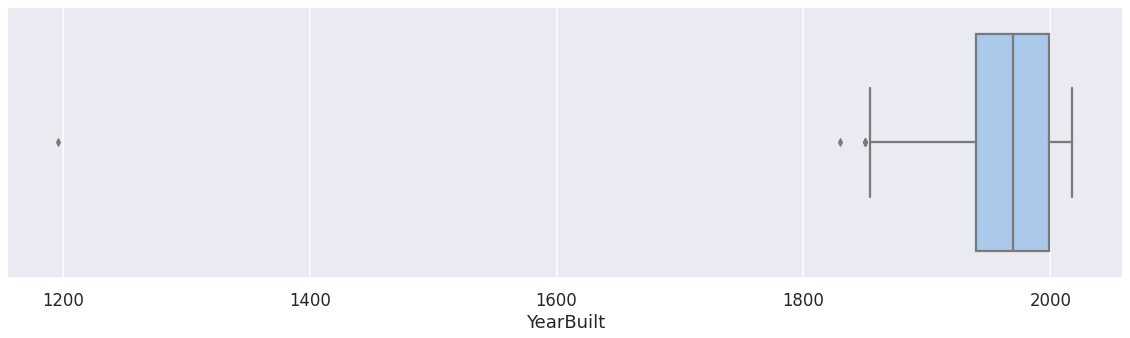

In [ ]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=melb_df['YearBuilt'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
print('0.5% <', melb_df['YearBuilt'].quantile(.005))
print('1% <', melb_df['YearBuilt'].quantile(.01))
print('5% <', melb_df['YearBuilt'].quantile(.05))
print('10% <', melb_df['YearBuilt'].quantile(.1))

0.5% < 1880.0
1% < 1880.0
5% < 1900.0
10% < 1910.0


In [ ]:
year_melb_df = melb_df[(melb_df["YearBuilt"] > 1800)  
                                             | (melb_df["YearBuilt"].isna())] 

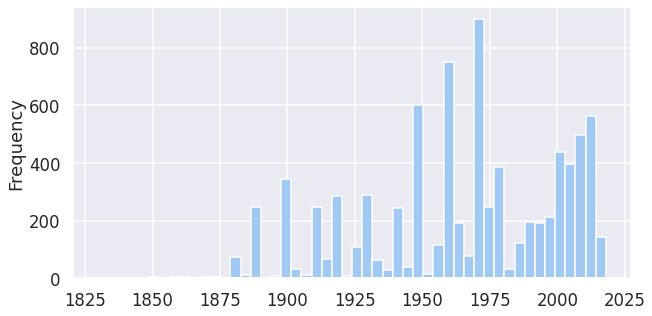

In [ ]:
plt.figure(figsize=(12, 10))
year_melb_df['YearBuilt'].plot(kind='hist', figsize=(10,5), bins=50)



In [ ]:
print("Perdida de datos")
print("-----------------")
print("Con respecto al dataset original: ", "{:.2f}".format((1 - len(year_melb_df) / len(orig_df))*100, 5)+'%'+ ' del dataset')

Perdida de datos
-----------------
Con respecto al dataset original:  0.01% del dataset


**Conclusiones de Exploración y Curación de YearBuilt**:

- Esta variable tiene muchos valores nulos (39,58%), y un outlier inferior extraño (año 1196) que decidimos eliminar. 
- El tratamiento de esta variable sería similar al de BuildingArea, en tanto es importante en la determinación del precio de las propiedades. Sin embargo, tiene un problema: si la mantenemos en el dataset, debemos imputar muchos valores, y esto no suele ser recomendable. 
- Como no tenemos herramientas en este punto para decidir si un modelo de predicción será mejor incluyendo ésta variable imputada o eliminándola, se opta por eliminar la variable.
- Luego en el entregable parte 2, "se la recupera" porque se solicíta explícitamente que se la impute por KNN.

##### **SellerG** (Categórica)

In [ ]:
melb_df['SellerG'].describe()

count      13580
unique       268
top       Nelson
freq        1565
Name: SellerG, dtype: object

In [ ]:
melb_df['SellerG'].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Asset               1
Tiernan's           1
Community           1
Hayeswinckle        1
McNaughton          1
Name: SellerG, Length: 268, dtype: int64

In [ ]:
seller_means = melb_regcat_df.groupby(['reg_cat','SellerG'])['Price'].describe().round().reset_index().sort_values('mean', ascending=False)
seller_means

,reg_cat,SellerG,count,mean,std,min,25%,50%,75%,max
286,Southern Metropolitan,Melbourne,1.0,4200000.0,NaN,4200000.0,4200000.0,4200000.0,4200000.0,4200000.0
329,Southern Metropolitan,VICProp,1.0,3812000.0,NaN,3812000.0,3812000.0,3812000.0,3812000.0,3812000.0
218,Southern Metropolitan,Assisi,1.0,3360000.0,NaN,3360000.0,3360000.0,3360000.0,3360000.0,3360000.0
333,Southern Metropolitan,Weast,1.0,3320000.0,NaN,3320000.0,3320000.0,3320000.0,3320000.0,3320000.0
21,Eastern Metropolitan,Darras,1.0,2950000.0,NaN,2950000.0,2950000.0,2950000.0,2950000.0,2950000.0
...,...,...,...,...,...,...,...,...,...,...
465,Western Metropolitan,hockingstuart/Village,1.0,345000.0,NaN,345000.0,345000.0,345000.0,345000.0,345000.0
195,Northern Metropolitan,Rosin,1.0,330000.0,NaN,330000.0,330000.0,330000.0,330000.0,330000.0
211,Northern Metropolitan,hockingstuart/Advantage,1.0,330000.0,NaN,330000.0,330000.0,330000.0,330000.0,330000.0
393,Western Metropolitan,Dingle,1.0,325000.0,NaN,325000.0,325000.0,325000.0,325000.0,325000.0


Text(0, 0.5, "Mediana 'Price'")

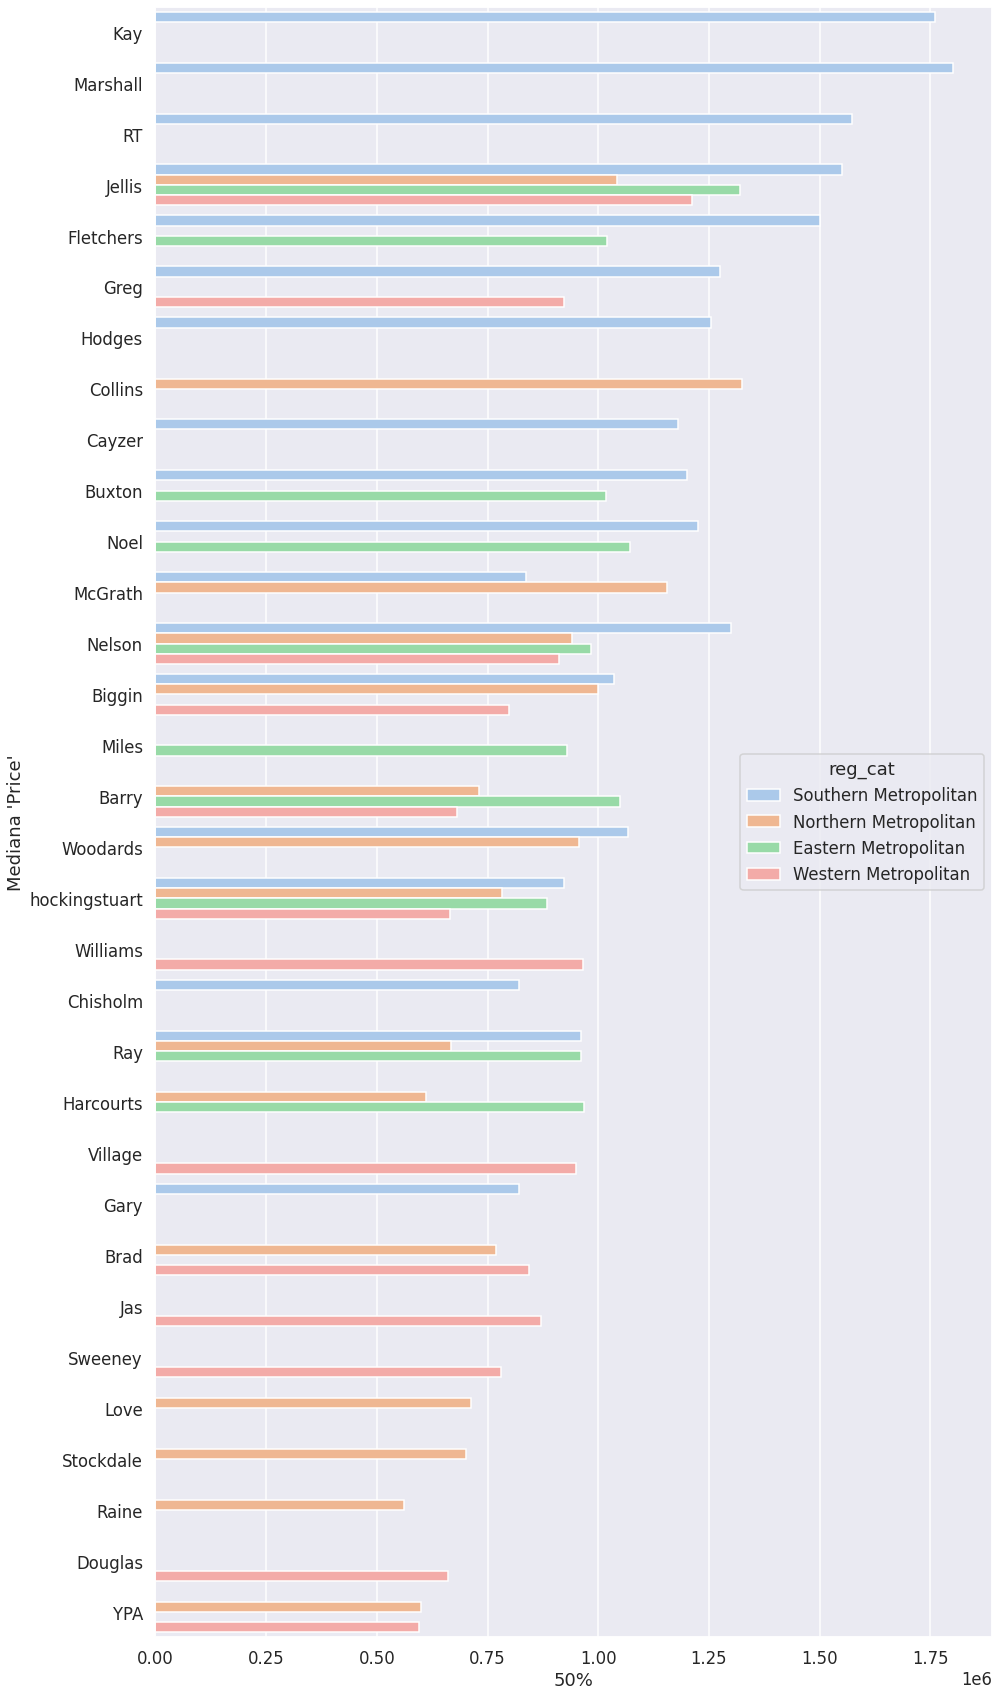

In [ ]:
fig, ax = plt.subplots(figsize=(15,30))
seaborn.barplot(data=seller_means[seller_means['count'] > 50],
                y='SellerG',
                x='50%',
                hue='reg_cat'
                )
plt.ylabel("Mediana 'Price'")

**Conclusiones de Exploración y Curación de SellerG:**

- Existen muchas personas con un nivel muy bajo de propiedades vendidas. 
- La mayoria de los casos se concentran en un grupo de vendedores, pero no tenemos un criterio adecuado para agruparlos. 
- Sin embargo, exploramos esta variable para ver si la mantenemos o no en el dataset, analizandola en forma combinada con el precio de la propiedad y con las regiones recategorizadas. 
- De los graficos vemos que la relacion mas fuerte esta entre la region y el precio, mas alla del vendedor. 
- Por todas estas razones decidimos descartar la variable SellerG.

##### **Method (Categórica)**

In [ ]:
melb_df['Method'].describe()

count     13580
unique        5
top           S
freq       9022
Name: Method, dtype: object

In [ ]:
method_means = melb_regcat_df.groupby(['reg_cat','Method'])['Price'].describe().round().reset_index().sort_values('mean', ascending=False)
method_means

,reg_cat,Method,count,mean,std,min,25%,50%,75%,max
14,Southern Metropolitan,VB,572.0,1455222.0,961716.0,160000.0,638750.0,1350000.0,1975000.0,8000000.0
10,Southern Metropolitan,PI,671.0,1392811.0,853184.0,131000.0,690500.0,1260000.0,1872500.0,5800000.0
11,Southern Metropolitan,S,3038.0,1385983.0,794974.0,255000.0,800250.0,1255000.0,1750000.0,7650000.0
12,Southern Metropolitan,SA,38.0,1310289.0,685747.0,247500.0,755000.0,1227500.0,1642500.0,3225000.0
0,Eastern Metropolitan,PI,201.0,1193085.0,747665.0,400000.0,800000.0,1088000.0,1400000.0,9000000.0
13,Southern Metropolitan,SP,376.0,1113544.0,717554.0,240000.0,559625.0,887500.0,1511250.0,5200000.0
4,Eastern Metropolitan,VB,139.0,1075612.0,574524.0,370000.0,700000.0,950000.0,1287500.0,4000000.0
1,Eastern Metropolitan,S,1350.0,1060093.0,422851.0,266000.0,761000.0,970500.0,1280750.0,3300000.0
2,Eastern Metropolitan,SA,17.0,980559.0,294933.0,650000.0,800000.0,900000.0,1246000.0,1750000.0
3,Eastern Metropolitan,SP,214.0,945376.0,439878.0,288000.0,656125.0,840000.0,1173500.0,3850000.0


Text(0, 0.5, "Mediana 'Price'")

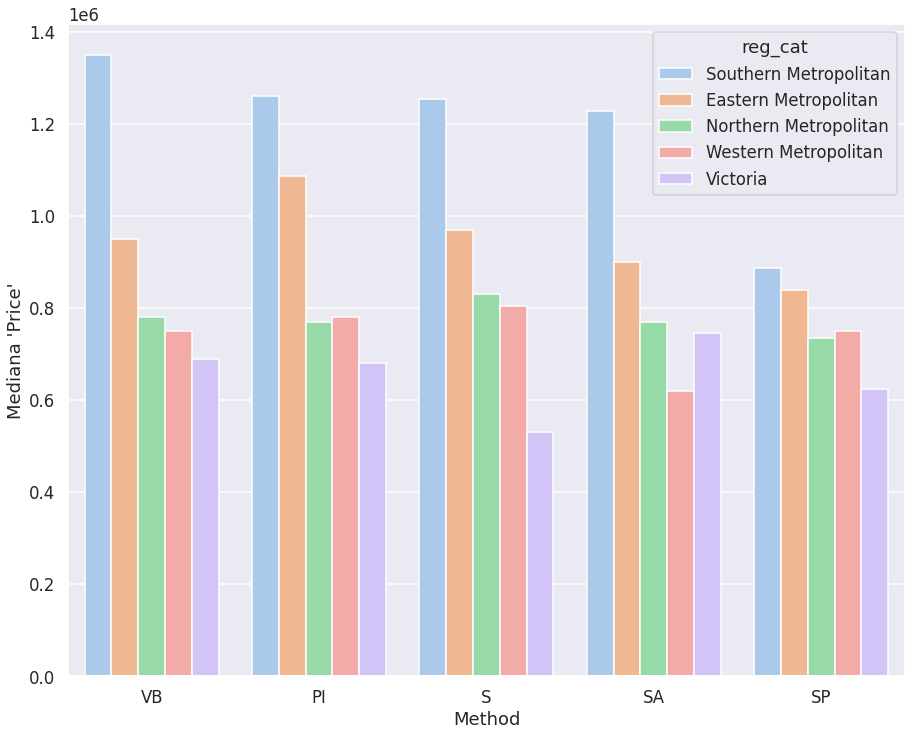

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
seaborn.barplot(data=method_means,
                x='Method',
                y='50%',
                hue='reg_cat'
                )
plt.ylabel("Mediana 'Price'")

**Conclusiones de Exploración y Curación de Method:**

Similar al caso de SellerG, la variable Method esta relacionada con las caracteristicas de la venta. Para analizarla, la combinamos con el precio de la propiedad y las regiones recategorizadas. Arribamos a una conclusión parecida al caso de SellerG: El metodo no influye significativamente sobre el precio de la propiedad, sino que este ultimo se vincula mas con la región.  Por tanto, también decidimos eliminarla.

##### **Date (of sold) (Numerica, fecha)**

In [ ]:
pandas.to_datetime(melb_df['Date'])

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

(array([735964., 736055., 736146., 736238., 736330., 736420., 736511.,
        736603., 736695.]), <a list of 9 Text major ticklabel objects>)

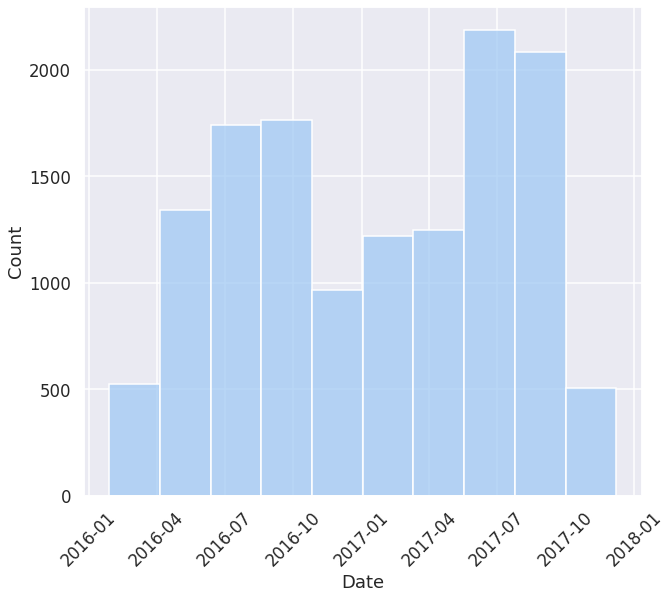

In [ ]:
fig = plt.figure(figsize=(10,9))
seaborn.histplot(pandas.to_datetime(melb_df['Date']), bins=10)
plt.xticks(rotation=45)

In [ ]:
# Reagrupacion de Date

melb_datecat_df = melb_df

def func(row):
    row['Date'] = pandas.to_datetime(row['Date'])
    if row['Date'] < pandas.to_datetime('2016-07-01'):
        return '2016 1º sem'
    elif row['Date'] < pandas.to_datetime('2017-01-01'):
        return '2016 2º sem'
    elif row['Date'] < pandas.to_datetime('2017-07-01'):
        return '2017 1º sem'
    elif row['Date'] < pandas.to_datetime('2018-01-01'):
        return '2017 2º sem'
    else:
        return 'NO'

melb_datecat_df['date_cat'] = melb_df.apply(func, axis=1).astype(str) # Categorizar

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

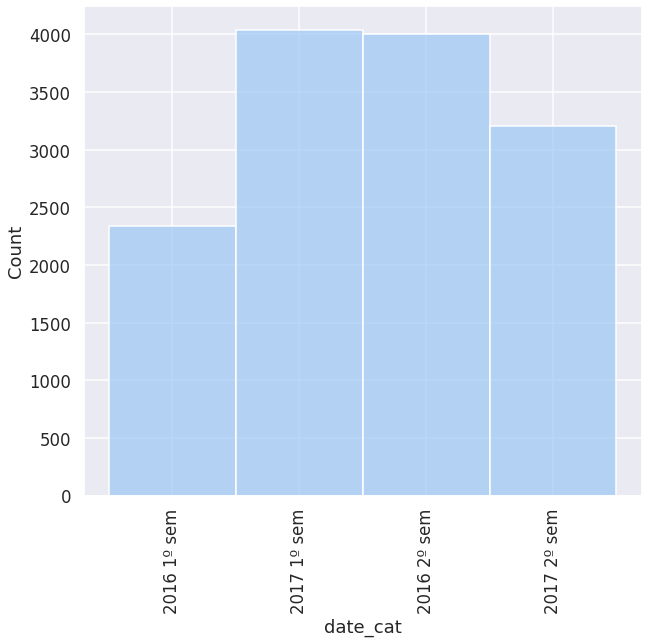

In [ ]:
fig = plt.figure(figsize=(10,9))
seaborn.histplot(melb_datecat_df['date_cat'])
plt.xticks(rotation=90)

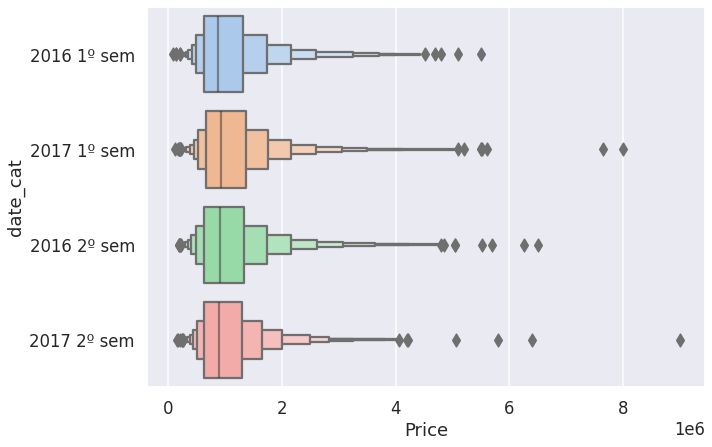

In [ ]:
figure = plt.figure(figsize=(10,7))
seaborn.boxenplot(data=melb_datecat_df, x='Price', y='date_cat')

**Conclusiones de Exploración y Curación de Date:**

La variable Date contiene las fechas de venta de las propiedades. No tiene valores nulos ni atipicos. Sin embargo, no encontramos una relacion al cruzarla con el precio de las propiedades luego de categorizarla por semestre. Podemos destacar que a pesar de que el nivel de ventas fluctúa de un semestre a otro, no sucede lo mismo con el precio. Por todos estos motivos, decidimos no incluirla dentro de los analisis posteriores. 

##### **Type** (Categórica)

In [ ]:
sum(melb_df['Type'].isna())

0

In [ ]:
melb_df.Type.describe()

count     13580
unique        3
top           h
freq       9449
Name: Type, dtype: object

In [ ]:
melb_df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
melb_df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

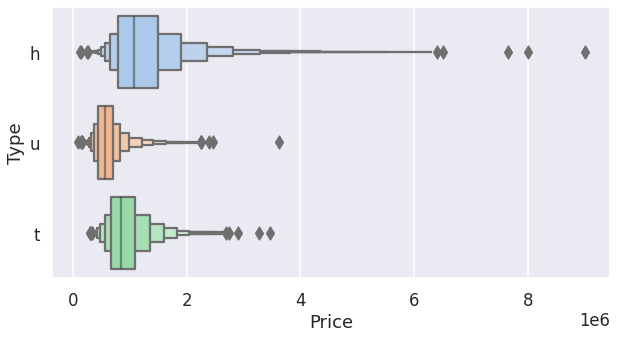

In [ ]:
fig = plt.figure(figsize=(10, 5))
seaborn.boxenplot(
    data=melb_df,
    x='Price',
    y='Type'
)

**Conclusiones de Exploración y Curación de Type:**

La variable Type fue analizada junto con la mayoria de las variables ya vistas, por lo que se omiten graficos con combinaciones en este punto. 

Dicha variable no tiene nulos, y muestra tres valores únicos en el dataset:
  - h    9449 (house,cottage,villa, semi,terrace)
  - u    3017 (unit, duplex)
  - t    1114 (townhouse)
  (no es necesario recategorizarla)

En el boxplot se observa la relacion entre el precio y el Type, donde 'h' se destaca por tener precios mas altos, luego sigue 't', y por ultimo 'u'. 

Al tratarse de una variable que por definición esta tan relacionada con las caracteristicas de la vivienda, resulta fundamental incluirla en analisis posteriores para predecir los precios de venta. 

## DECISIONES DEFINITIVAS -> Dataset curado


#### **Descarte de variables**

Las siguientes columnas fueron descartadas para el análisis de predicción de valor de una propiedad:

Numéricas:
- Lattitude
- Longitude
- Address
- Bedroom2
- Bathroom
- Building Area
- Year Built

Categóricas:
- Council Area*
- Method
- Date (Categorizada por semestre)
- SellerG
- Postcode*

**Se conservan para utilizarlas en ejercicios posteriores pero no por influencia sobre Price*

In [ ]:
# Para recordar: cantidad de nulos previo a la curación:
melb_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2           16
Bathroom           34
Car                62
Landsize            0
BuildingArea     6467
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Car_cat             0
dist_cat            0
reg_cat             0
Suburb_cat          2
date_cat            0
dtype: int64

#### **Curación definitiva, de casos nulos y atípicos**

In [ ]:
# Rooms
curated_melb_df = melb_df[melb_df['Rooms'] <= 5]

# Car
curated_melb_df = curated_melb_df[(curated_melb_df["Car"] <= 6) | 
                                  (curated_melb_df["Car"].isna())]

# Landsize
curated_melb_df = curated_melb_df[curated_melb_df['Landsize'] < 433013]
curated_melb_df['Landsize'] = curated_melb_df['Landsize'].replace(0, numpy.nan)

# Price
curated_melb_df = curated_melb_df[curated_melb_df["Price"] <= 7874734] # 7874734


# BuildingArea y YearBuild no se agregan en éste dataset, pero tienen valores extremos y nulos.

curated_melb_df = curated_melb_df[(curated_melb_df["BuildingArea"] <= 2000) | 
                                  (curated_melb_df["BuildingArea"].isna())] 

curated_melb_df = curated_melb_df[(curated_melb_df["YearBuilt"] > 1800) | 
                                  (curated_melb_df["YearBuilt"].isna())] 

In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Car_cat', 'dist_cat',
       'reg_cat', 'Suburb_cat', 'date_cat'],
      dtype='object')

#### **Obtención del dataset curado**

In [ ]:
# Eliminación de columnas
deleted_columns = [
                    'Lattitude',
                    'Longtitude',
                    'Address',
                    'Bedroom2',
                    'Bathroom',
                    'Method',
                    'Date',
                    'SellerG',
]

In [ ]:
curated_melb_df.drop(columns=deleted_columns, inplace=True)

In [ ]:
curated_melb_df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Distance            0
Postcode            0
Car                62
Landsize         1935
BuildingArea     6415
YearBuilt        5326
CouncilArea      1355
Regionname          0
Propertycount       0
Car_cat             0
dist_cat            0
reg_cat             0
Suburb_cat          0
date_cat            0
dtype: int64

In [ ]:
curated_melb_df.describe(include="all")

,Suburb,Rooms,Type,Price,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Car_cat,dist_cat,reg_cat,Suburb_cat,date_cat
count,13466,13466.000000,13466,1.346600e+04,13466.000000,13466.000000,13404.000000,11531.000000,7051.000000,8140.000000,12111,13466,13466.000000,13466,13466,13466,13466,13466
unique,313,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,8,NaN,2,4,5,10,4
top,Reservoir,NaN,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,Southern Metropolitan,NaN,Tiene cochera,< 10km,Southern Metropolitan,Suburb_group10,2017 1º sem
freq,358,NaN,9339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1158,4656,NaN,12443,7282,4656,2241,4003
mean,NaN,2.914674,NaN,1.068835e+06,10.118907,3105.178969,1.593256,607.743040,143.213587,1964.836732,NaN,NaN,7457.675702,NaN,NaN,NaN,NaN,NaN
std,NaN,0.916773,NaN,6.256852e+05,5.849387,90.604853,0.923567,1519.265237,85.371284,36.289829,NaN,NaN,4384.135065,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,8.500000e+04,0.000000,3000.000000,0.000000,1.000000,1.000000,1830.000000,NaN,NaN,249.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,NaN,6.500000e+05,6.100000,3044.000000,1.000000,268.000000,93.000000,1940.000000,NaN,NaN,4380.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.000000,NaN,9.000000e+05,9.200000,3084.000000,2.000000,531.000000,125.000000,1970.000000,NaN,NaN,6543.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,1.325000e+06,13.000000,3148.000000,2.000000,673.000000,172.000000,1999.000000,NaN,NaN,10331.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(curated_melb_df.columns)

18

In [ ]:
curated_melb_df

,Suburb,Rooms,Type,Price,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Car_cat,dist_cat,reg_cat,Suburb_cat,date_cat
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem
1,Abbotsford,2,h,1035000.0,2.5,3067.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem
2,Abbotsford,3,h,1465000.0,2.5,3067.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8,2017 1º sem
3,Abbotsford,3,h,850000.0,2.5,3067.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2017 1º sem
4,Abbotsford,4,h,1600000.0,2.5,3067.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,16.7,3150.0,2.0,652.0,NaN,1981.0,NaN,South-Eastern Metropolitan,7392.0,Tiene cochera,< 20km,Eastern Metropolitan,Suburb_group9,2017 2º sem
13576,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,333.0,133.0,1995.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem
13577,Williamstown,3,h,1170000.0,6.8,3016.0,4.0,436.0,NaN,1997.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem
13578,Williamstown,4,h,2500000.0,6.8,3016.0,5.0,866.0,157.0,1920.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem


# Ejercicio 1 - Punto 3

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Datos adicionales

Vamos a aumentar los datos presentes en el conjunto dado con un dataset similar: las publicaciones de la plataforma AirBnB en Melbourne en el año 2018. El objetivo es estimar con mayor presición el valor del vecidanrio de cada propiedad.

Para ello, utilizaremos [un conjunto de datos](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) de *scrapings* del sitio realizado por [Tyler Xie](https://www.kaggle.com/tylerx), también disponible en una competencia de Kaggle.

Nos quedaremos con algunas columnas.

Compartido con el primer dataset:

- 'suburb', ('Suburb' en el melb dataset).
- 'zipcode', ('Postcode' en el melb dataset).
- 'latitude', ('Lattitude' en el melb dataset).
- 'longitude', ('Longtitude' en el melb dataset)


No compartido:
- 'description', 
- 'neighborhood_overview',
- 'street', ¿es sólo la calle? 
- 'neighborhood' (59), ¿No tiene una relación directa con "Suburb" (314) del melb dataset? Comparten 51 valores.
- 'city', 
- 'state', 
- 'price', ¿De alquiler por día?
- 'weekly_price', ¿De alquiler por semana?
- 'monthly_price', ¿De alquiler por mes?

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
# este dataset tiene 84 columnas
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)


In [ ]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [ ]:
airbnb_df.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

In [ ]:
len(airbnb_df)

22895

Para poder realizar esta combinación de datos, tenemos que encontrar una columna que contenga información en común. Utilizaremos el zipcode.

In [ ]:
airbnb_df.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

 Sin embargo, este zipcode tiene tipos diferentes, que tendremos que estandarizar antes de continuar con la combinación de los datos.

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df['zipcode'].dtype # ¿NO DEBERÍAMOS PASARLO A ENTERO?

dtype('float64')

In [ ]:
sum(airbnb_df['zipcode'].isna())

146

### Valores en común

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes.

In [ ]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection)) # Tenemos 191 zipcodes en airbnb de 198 que teníamos en melb, perdemos 7 nomás.

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [ ]:
# Melb Zipcodes not in intersection
set(melb_df.Postcode.unique()) - set(intersection)

{3022.0, 3061.0, 3340.0, 3431.0, 3437.0, 3438.0, 3756.0}

In [ ]:
# Cantidad de registros en Melb con esos códigos:
len(melb_df.Postcode[melb_df.Postcode.isin([3022.0, 3061.0, 3340.0, 3431.0, 3437.0, 3438.0, 3756.0])])

20

Observación: Tenemos 20 registros de melb que no podremos cruzar por zipcode para sumar info de airbnb, es poco.

### Exploración visual

Para terminar de asegurarnos de que las áreas representadas por ambos datasets son consitentes, podemos representar las coordenadas en un mapa usando Plotly.

Aunque estas visualizaciones no son completas en cuanto a la información geográfica que muestran, aproximadamente podemos ver que se tratan de zonas similares.

In [ ]:
import plotly.express as px
data = melb_df.sample(300)
fig = px.scatter_geo(
    data, lat=data.Lattitude, lon=data.Longtitude, color=data.YearBuilt
    )
fig.update_geos(fitbounds="locations")
fig.show()

In [ ]:
import plotly.express as px
color_col = 'city'
data = airbnb_df[~airbnb_df[color_col].isna()].sample(300)
fig = px.scatter_geo(
    data, lat=data.latitude, lon=data.longitude, color=data[color_col]
    )
fig.update_geos(fitbounds="locations")
fig.show()

## Operación merge

Es hora de combinar ambos conjuntos de datos. Una opción frecuentemente tentadora es aplicar la operación merge sin analizar demasiado la situación.

Recordemos que nuestro objetivo es agregar información sobre el valor del vecindario de la propiedad. ¿Qué información del conjunto de airbnb nos sirve para representar esto?

* Promedio de `price` por zipcode
* Promedio de `weekly_price` por zipcode
* Promedio de `monthly_price` por zipcode

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']
airbnb_df[['price', 'weekly_price', 'monthly_price']].isnull().sum() 

price                0
weekly_price     20371
monthly_price    21004
dtype: int64

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']

## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.0,1,NaN,NaN
1,2134.0,50.0,1,NaN,NaN
2,2582.0,104.0,1,NaN,NaN


In [ ]:
len(airbnb_price_by_zipcode) 

247

In [ ]:
# Mergeamos éste df con el promedio de precio diario por zipcode, con el dataset de melb.
merged_sales_df = curated_melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

,Suburb,Rooms,Type,Price,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Car_cat,dist_cat,reg_cat,Suburb_cat,date_cat,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
8069,Newport,3,h,2000000.0,8.4,3015.0,2.0,1070.0,NaN,NaN,Hobsons Bay,Western Metropolitan,5498.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group7,2017 1º sem,3015.0,132.046154,65.0,706.125000,2002.333333
9833,Hampton,3,h,1325000.0,13.8,3188.0,2.0,400.0,NaN,NaN,Unavailable,Southern Metropolitan,5454.0,Tiene cochera,< 20km,Southern Metropolitan,Suburb_group10,2017 1º sem,3188.0,245.112676,71.0,1273.600000,4694.555556
11744,Templestowe Lower,4,h,1320000.0,12.4,3107.0,2.0,774.0,NaN,NaN,Manningham,Eastern Metropolitan,5420.0,Tiene cochera,< 20km,Eastern Metropolitan,Suburb_group9,2017 2º sem,3107.0,228.263158,19.0,350.000000,1400.000000
9691,Abbotsford,3,h,855000.0,3.0,3067.0,1.0,92.0,116.0,2004.0,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2017 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
5682,Southbank,4,u,990000.0,1.2,3006.0,1.0,NaN,172.0,1995.0,Melbourne,Southern Metropolitan,8400.0,Tiene cochera,< 10km,Southern Metropolitan,Suburb_group2,2016 2º sem,3006.0,188.851735,1268.0,1239.827273,4358.556701


In [ ]:
len(merged_sales_df) # vemos que no cambia el tamaño de curated_melb_df

13466

### Investigar al menos otras 2 variables que puedan servir para combinar los datos

Ambos dataset comparten las siguientes columnas:

- Suburb
- Lattitud y Longitude

##### Suburb

De los 312 suburbios que hay en el dataset original, se pueden mapear 296 con los datos de Airbnb 

In [ ]:
curated_melb_df['Suburb'].nunique()

313

In [ ]:
# DUDA/PBA: ¿Se podría hacer algo similar con los suburbios (haciendo la agrupación de precio medio diario de airbnb por suburbio)?
len(set(curated_melb_df['Suburb'].unique()) & set(airbnb_df['suburb'].unique())) # Comparten 296 valores.

296

In [ ]:
intersection_sub = set(melb_df['Suburb'].unique()) & set(airbnb_df['suburb'].unique())
print("Airbnb unique suburbs", len(airbnb_df.suburb.unique()))
print("Sales unique suburbs", len(melb_df.Suburb.unique()))
print("Common suburbs", len(intersection_sub)) # En airbnb hay 296 suburbios de los 314 que hay en melb. Por lo tanto podríamos hacer el merge por suburbio.

Airbnb unique suburbs 543
Sales unique suburbs 314
Common suburbs 296


##### Latitud y Longitud

Otra manera de unir ambos datasets es utilizando los campos de `lattitude` y `longitude`.

No pueden unirse directamente con `pandas.merge` o `pandas.join` ya que se trata de variables continuas..... Necesitaremos unirlas por proximidad en lugar de por el valor exacto.

Para hacer esta union, puede usarse la clase BallTree de Sklearn.

In [ ]:
print("Casos en dataframe original: ", len(melb_df[['Lattitude', 'Longtitude']]))
print("Casos en dataframe de Airbnb: ", len(airbnb_df[['latitude', 'longitude']]))

Casos en dataframe original:  13580
Casos en dataframe de Airbnb:  22895


In [ ]:
print("Tipo de dato en dataset original: ",melb_df['Lattitude'].dtype, melb_df['Longtitude'].dtype)
print("Tipo de dato en dataset Airbnb: ", airbnb_df['latitude'].dtype, airbnb_df['longitude'].dtype)

Tipo de dato en dataset original:  float64 float64
Tipo de dato en dataset Airbnb:  float64 float64


Calcular los vecinos mas cercanos para las filas de los dos DataFrames implicaria 13580*22895 = 310.914.100 operaciones de comparación. Ademas, almacenaria una matriz de ese tamaño de tipo de dato float64. Sabiendo que este tipo de dato ocupa 2 bytes, tendriamos una matriz que pesaria 621.8 MB

Teniendo la cantidad de memoria suficiente para realizar esta operacion, se podria armar un BallTree() usando los pares de latitud y longitud del dataframe original, y luego realizarle un query con los datos del dataframe de airbnb.

Si elegimos un k = 3, por ejemplo, El resultado del query son dos array, uno con los 3 indices del dataframe original que esten mas cercanos a cada punto del dataframe de airbnb, y otro array con las distancias a cada uno de esos puntos. 

Cada array va a tener una dimension de 22895x3 

# Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora al conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## 2.1 Imputación de valores faltantes en Council Area basados en Suburb

In [ ]:
merged_sales_df

,Suburb,Rooms,Type,Price,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Car_cat,dist_cat,reg_cat,Suburb_cat,date_cat,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,2.5,3067.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,2.5,3067.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,No tiene,< 10km,Northern Metropolitan,Suburb_group8,2017 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,2.5,3067.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2017 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,2.5,3067.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,Tiene cochera,< 10km,Northern Metropolitan,Suburb_group8,2016 1º sem,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13461,Wheelers Hill,4,h,1245000.0,16.7,3150.0,2.0,652.0,NaN,1981.0,NaN,South-Eastern Metropolitan,7392.0,Tiene cochera,< 20km,Eastern Metropolitan,Suburb_group9,2017 2º sem,3150.0,124.026455,189.0,526.350000,1901.611111
13462,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,333.0,133.0,1995.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem,3016.0,191.094595,74.0,612.250000,2119.750000
13463,Williamstown,3,h,1170000.0,6.8,3016.0,4.0,436.0,NaN,1997.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem,3016.0,191.094595,74.0,612.250000,2119.750000
13464,Williamstown,4,h,2500000.0,6.8,3016.0,5.0,866.0,157.0,1920.0,NaN,Western Metropolitan,6380.0,Tiene cochera,< 10km,Western Metropolitan,Suburb_group9,2017 2º sem,3016.0,191.094595,74.0,612.250000,2119.750000


Para imputar los valores faltantes de las variables, se decidió crear un nuevo dataset, usando los datos de la página del gobierno de Australia. Se puede encontrar [en la página web](https://knowyourcouncil.vic.gov.au/councils) , o acceder descargandolo [por este link ](https://github.com/Natali-PP/diplodatos2021/blob/main/EyCD/Victorian-Place-Names-and-Councils.docx)

Pero este es un archivo de formato .docx (Microsoft Word). Entonces, se lo transformó a un archivo .txt por una página web - se puede encontrar [aquí](https://github.com/Natali-PP/diplodatos2021/blob/main/EyCD/Victorian-Place-Names-and-Councils.txt)

Este archivo tiene un formato

> `Suburbio (zipcode)    Council_Area`

Asique debemos limpiarlo, eliminando los paréntesis y el zipcode.

Creamos un pequeño script con python que toma el archivo .txt original, e itera sobre cada linea de ese archivo. 
```python
import re

with open('./Victorian-Place-Names-and-Councils.txt') as fin, open('victoria-councils-transformed.txt', 'w') as fout:
    for line in fin:
        fout.write(re.sub(r'[(]\d{4}[)]','',line))
```
En cada línea, busca los parantesis y los 4 digitos y los suplanta con un espacio vacío. A esto, lo escribe en otro archivo, que [se puede encontrar aquí](https://github.com/Natali-PP/diplodatos2021/blob/main/EyCD/victoria-councils-transformed.txt)

Este es el archivo que utilizaremos para crear nuestro dataframe


In [ ]:
government_councils_df=pandas.read_csv('https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/EyCD/victoria-councils-transformed.txt',sep='\t',engine='python',dtype=str)

In [ ]:
government_councils_df[:4]

,Suburb,Council_Area
0,Abbeyard,Alpine S
1,Abbotsford,Yarra C
2,Aberfeldie,Moonee Valley C
3,Aberfeldy,Baw Baw S


Vemos que el Council Area aquí tiene una letra al final, y este no es el formato del dataframe original.

In [ ]:
# Eliminamos la ultima letra porque asi esta formateado el dataset melb_df
government_councils_df['Council_Area']=[' '.join( str(x).split()[:-1]) for x in government_councils_df['Council_Area']]

In [ ]:
government_councils_df['Council_Area'].sample(5)

485          Moorabool
2940       Corangamite
2873          Brimbank
1557         Hindmarsh
583     Macedon Ranges
Name: Council_Area, dtype: object

Ahora sí tienen el mismo formato.

Pero vemos que el tipo es objeto. Si lo convertimos a string de manera explícita?

In [ ]:
str(government_councils_df['Suburb'][474:475])

'474    Bung Bong \nName: Suburb, dtype: object'

Se tranforma de manera extraña. Como va a ser un problema regular, definimos a continuación esta función auxilar para su correcto tratamiento.

In [ ]:
def transform_councils_df_row(row):
  return ' '.join(str(row).split()[1:-4])

In [ ]:
transform_councils_df_row(government_councils_df['Suburb'][474:475])

'Bung Bong'

Como vamos a realizar una operación apply a cada fila, generamos dos funciones:
* `set_council_area_from_suburb`: dado un suburbio, devuelve el Council Area del dataset del gobierno autraliano

* `reasign_council_area`: funcion auxiliar que funciona como filtro. Aplica la función anterior si el valor del dataframe original de la columna CouncilArea es nulo.

In [ ]:
# tomando un string de suburbio de malb_df, devuelve el council area del dataframe councils con ese suburb
def set_council_area_from_suburb(suburb):
  return transform_councils_df_row(government_councils_df[ government_councils_df['Suburb']==suburb+' ' ]['Council_Area'])

In [ ]:
def reasign_council_area(row):
  if pandas.isnull(row['CouncilArea']):
    return set_council_area_from_suburb(row['Suburb'])
  else:
    return row['CouncilArea']

In [ ]:
merged_sales_df['Council_Area']=merged_sales_df.apply(lambda x: reasign_council_area(x), axis=1)

In [ ]:
pandas.isnull( merged_sales_df['Council_Area']).value_counts()

False    13466
Name: Council_Area, dtype: int64

Ahora hemos eliminado todos los null. Proseguimos a analizar si quedan Council areas con valor `''`, es decir que no aparecen en el dataset creado con los datos del gobierno.

In [ ]:
#suburbios que se computo como ''  porque no los encontro en el df creado con datos del gobierno
merged_sales_df[merged_sales_df['Council_Area'] == '']['Suburb'].value_counts()

Glen Waverley       19
West Footscray       9
South Morang         3
West Melbourne       2
North Warrandyte     1
St Helena            1
Cremorne             1
Name: Suburb, dtype: int64

Por lo que se puede observar, existen las siguientes situaciones: 

##### Casos que no aparecen en el dataset del gobierno pero sí en la página web

Utilizamos la buscador web de la pàgina web oficial https://knowyourcouncil.vic.gov.au/councils , donde se puede acceder al documento del cual creamos el dataset de councils y suburbs.

Al buscar el suburbio 'Glen Waverley' nos da la coucil area Monash.

Al buscar el suburbio 'Cremorne' nos da Yarra.

##### Diferencia de nomenclatura al referirse a los suburbios

En el caso de que el suburbio sea conocido como una ampliación cardinal de otro suburbio, que lleven en su nombre por ejemplo South, West, etc, éstos son nombrados diferentes en los dos datasets. 

Se ven 4 casos

In [ ]:
print(f'Buscando como West Footscray: {set_council_area_from_suburb("West Footscray")} \nBuscando como Footscray West: {set_council_area_from_suburb("Footscray West")} \n')
print(f'Buscando como South Morang: {set_council_area_from_suburb("South Morang")} \nBuscando como Morang South: {set_council_area_from_suburb("Morang South")} \n')
#print(f'{set_council_area_from_suburb("South Morang")}')
print(f'Buscando como West Melbourne: {set_council_area_from_suburb("West Melbourne")} \nBuscando como Melbourne West: {set_council_area_from_suburb("Melbourne West")}\n')
print(f'Buscando como North Warrandyte: {set_council_area_from_suburb("North Warrandyte")} \nBuscando como Warrandyte North: {set_council_area_from_suburb("Warrandyte North")}\n')



Buscando como West Footscray:  
Buscando como Footscray West: Maribyrnong 

Buscando como South Morang:  
Buscando como Morang South: Whittlesea 

Buscando como West Melbourne:  
Buscando como Melbourne West: Melbourne

Buscando como North Warrandyte:  
Buscando como Warrandyte North: Nillumbik



En el caso de St Helena, aparece como Saint Helena en el dataframe del gobierno australiano.

In [ ]:
print(f'Buscando como St Helena: {set_council_area_from_suburb("St Helena")} \nBuscando como Saint Helena: {set_council_area_from_suburb("Saint Helena")}')


Buscando como St Helena:  
Buscando como Saint Helena: Banyule


Tomando en cuenta lo descripto, escribimos de nuevo la función, para tomar en cuenta estos casos.

Si el valor no es ninguno de estos, se aplica el valor correspondiente de la columna auxiliar creada `Council_Area`.

In [ ]:
def correct_lost_council_areas(row):
  if row['Council_Area'] == '':
    if row['Suburb'] == 'St Helena':
      return 'Saint Helena'
    elif row['Suburb'] == 'West Footscray' or row['Suburb'] == 'South Morang' or row['Suburb'] == 'West Melbourne' or row['Suburb'] == 'North Warrandyte':
      return ' '.join(numpy.roll(str(row['Suburb']).split(),1))
    elif row['Suburb'] == 'Glen Waverley':
      return 'Monash'
    elif row['Suburb'] == 'Cremorne':
      return 'Yarra'
  else:
    return row['Council_Area']

In [ ]:
merged_sales_df['CouncilArea']=merged_sales_df.apply(lambda row: correct_lost_council_areas(row) , axis=1)

Verificamos que no queden valores null o valores `''`, para dar por concluido el trabajo de este ejercicio.

In [ ]:
len(merged_sales_df[ merged_sales_df['CouncilArea'] == ''])

0

In [ ]:
pandas.isnull(merged_sales_df['Council_Area']).value_counts()

False    13466
Name: Council_Area, dtype: int64

In [ ]:
merged_sales_df.isnull().sum()

Suburb                          0
Rooms                           0
Type                            0
Price                           0
Distance                        0
Postcode                        0
Car                            62
Landsize                     1935
BuildingArea                 6415
YearBuilt                    5326
CouncilArea                     0
Regionname                      0
Propertycount                   0
Car_cat                         0
dist_cat                        0
reg_cat                         0
Suburb_cat                      0
date_cat                        0
zipcode                        18
airbnb_price_mean              18
airbnb_record_count            18
airbnb_weekly_price_mean      866
airbnb_monthly_price_mean    1255
Council_Area                    0
dtype: int64

## 2.2 Imputación de los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB. 

#### Consideraciones

No se van a imputar las columnas BuildingArea ni  YearBuilt, ya que se hará en la parte 2 usando KNN

Columnas a imputar:
- Car
- Landsize
- airbnb_price_mean
- airbnb_weekly_price_mean
- airbnb_monthly_price_mean

Estas columnas son las que tienen valores nulos del grupo de columnas que decidimos conservar luego del analisis. Se van a imputar usando todas las columnas numericas del dataset curado.

La variable Landsize no posee nulos originalmente, pero se decide imputar sobre los casos en 0 transformados a nulo, ya que este valor no tiene sentido en la variable, como se explicó en ejercicios anteriores.

#### Metodo elegido

Usamos el imputador de Scikitlearn `IterativeImputer`. Internamente funciona similar al MICE en R, utilizando como estrategia inicial el calculo de la media.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Note: a call to the transform method of IterativeImputer is not allowed
#       to change the number of samples

imp = IterativeImputer(max_iter=10, random_state=0)

#### Imputacion en columnas con nulos

In [ ]:
# Definimos el conjunto de entrenamiento con la variable a imputar y el resto
# que se usara para imputarla

imp_columns = ['Car',
                'Price',
                'airbnb_price_mean',
                'airbnb_weekly_price_mean',
                'airbnb_monthly_price_mean',
                'Distance',
                'Rooms',
                'Landsize']

x_train = merged_sales_df[imp_columns]

In [ ]:
imp.fit(x_train)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:
# Obtenemos la columna imputada de Car aplicando transform en el conjunto de prueba
# 

x_test = merged_sales_df[imp_columns]
x_test = numpy.round(imp.transform(x_test))
x_test = pandas.DataFrame(x_test, columns=imp_columns)
x_test # 39 casas con 2 baños, 23 casas con 1 baño.

,Car,Price,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Distance,Rooms,Landsize
0,1.0,1480000.0,131.0,605.0,2187.0,2.0,2.0,202.0
1,0.0,1035000.0,131.0,605.0,2187.0,2.0,2.0,156.0
2,0.0,1465000.0,131.0,605.0,2187.0,2.0,3.0,134.0
3,1.0,850000.0,131.0,605.0,2187.0,2.0,3.0,94.0
4,2.0,1600000.0,131.0,605.0,2187.0,2.0,4.0,120.0
...,...,...,...,...,...,...,...,...
13461,2.0,1245000.0,124.0,526.0,1902.0,17.0,4.0,652.0
13462,2.0,1031000.0,191.0,612.0,2120.0,7.0,3.0,333.0
13463,4.0,1170000.0,191.0,612.0,2120.0,7.0,3.0,436.0
13464,5.0,2500000.0,191.0,612.0,2120.0,7.0,4.0,866.0


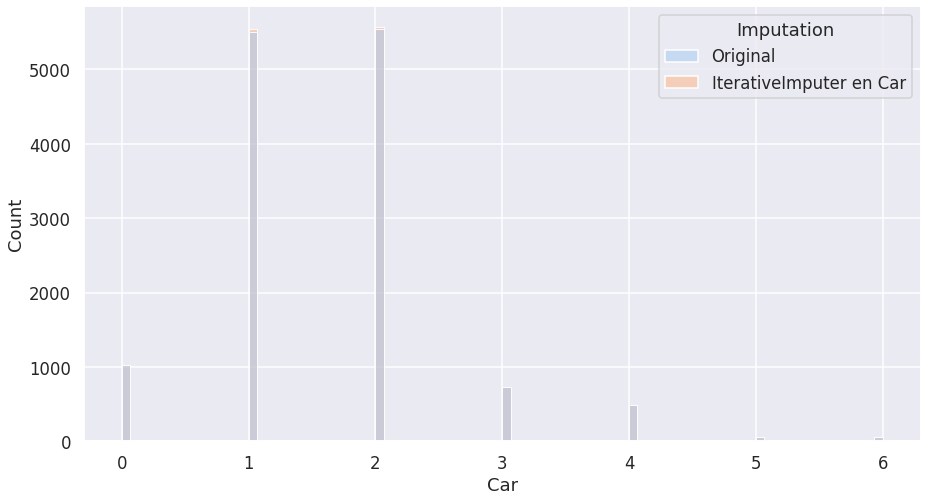

In [ ]:
car_original = merged_sales_df[['Car']]
car_original['Imputation'] = 'Original'
car_completo = x_test[['Car']]
car_completo['Imputation'] = 'IterativeImputer en Car'
data = pandas.concat([car_original, car_completo])
fig = plt.figure(figsize=(15, 8))
seaborn.histplot(data=data, x='Car', hue="Imputation")

Como se puede observar en el grafico, el resultado de la imputacion da una distribucion muy parecida a la original, solo que no se puede visualizar claramente porque es muy pequeña la cantidad de casos imputados en relacion al original. Si se hace zoom sobre el grafico se puede apreciar la diferencia.

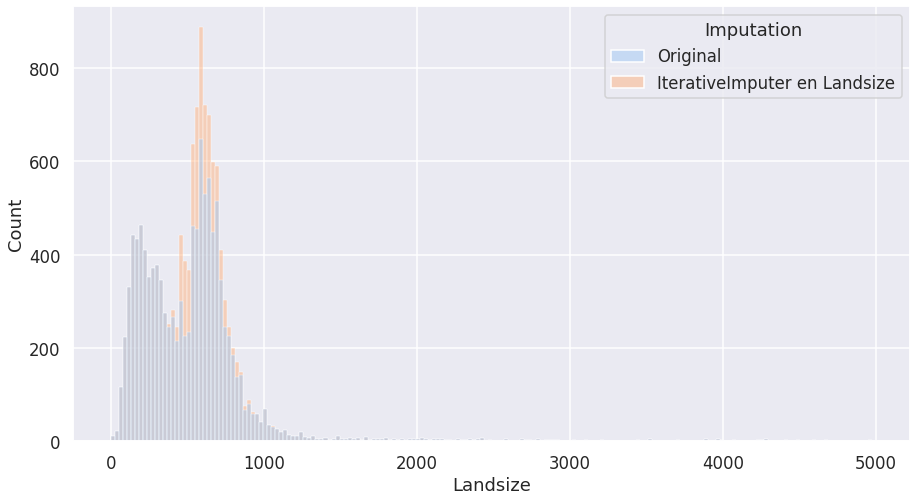

In [ ]:
land_original = merged_sales_df[['Landsize']]
land_original['Imputation'] = 'Original'
land_completo = x_test[['Landsize']]
land_completo['Imputation'] = 'IterativeImputer en Landsize'
data = pandas.concat([land_original, land_completo])
fig = plt.figure(figsize=(15, 8))
seaborn.histplot(data=data[data['Landsize'] < 5000], x='Landsize', hue="Imputation")

En este grafico podemos observar en color naranja las predicciones del imputador sobre los 1939 valores en 0 transformados a nulo de la variable Landsize. Se restringe el rango del eje horizontal para visualizar mejor los datos imputados.

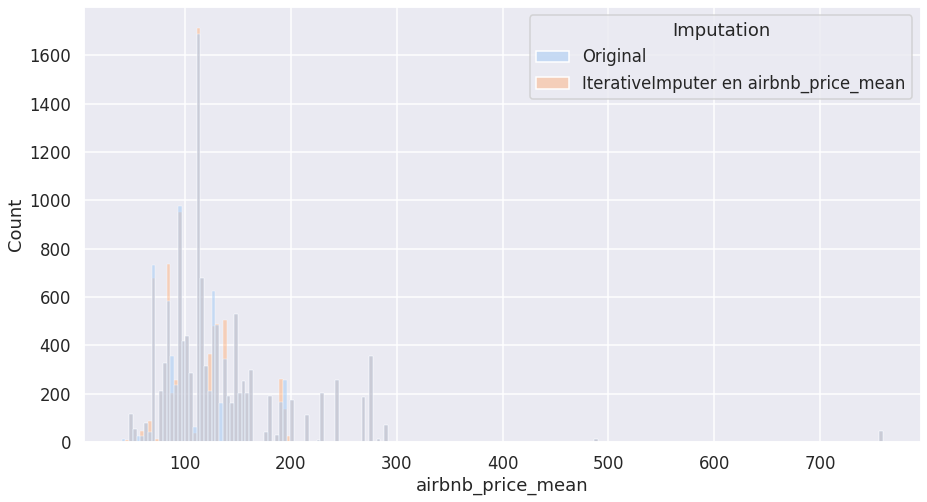

In [ ]:
day_original = merged_sales_df[['airbnb_price_mean']]
day_original['Imputation'] = 'Original'
day_completo = x_test[['airbnb_price_mean']]
day_completo['Imputation'] = 'IterativeImputer en airbnb_price_mean'
data = pandas.concat([day_original, day_completo])
fig = plt.figure(figsize=(15, 8))
seaborn.histplot(data=data, x='airbnb_price_mean', hue="Imputation")

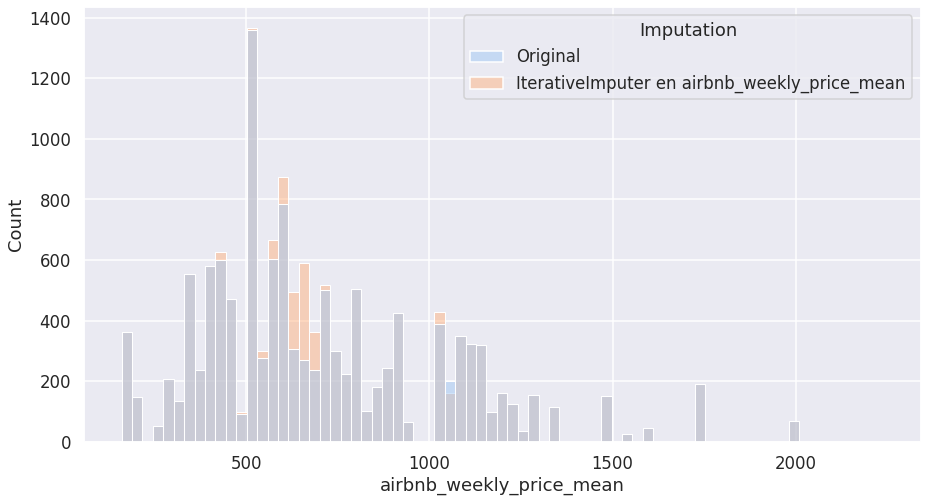

In [ ]:
wkly_original = merged_sales_df[['airbnb_weekly_price_mean']]
wkly_original['Imputation'] = 'Original'
wkly_completo = x_test[['airbnb_weekly_price_mean']]
wkly_completo['Imputation'] = 'IterativeImputer en airbnb_weekly_price_mean'
data = pandas.concat([wkly_original, wkly_completo])
fig = plt.figure(figsize=(15, 8))
seaborn.histplot(data=data, x='airbnb_weekly_price_mean', hue="Imputation")

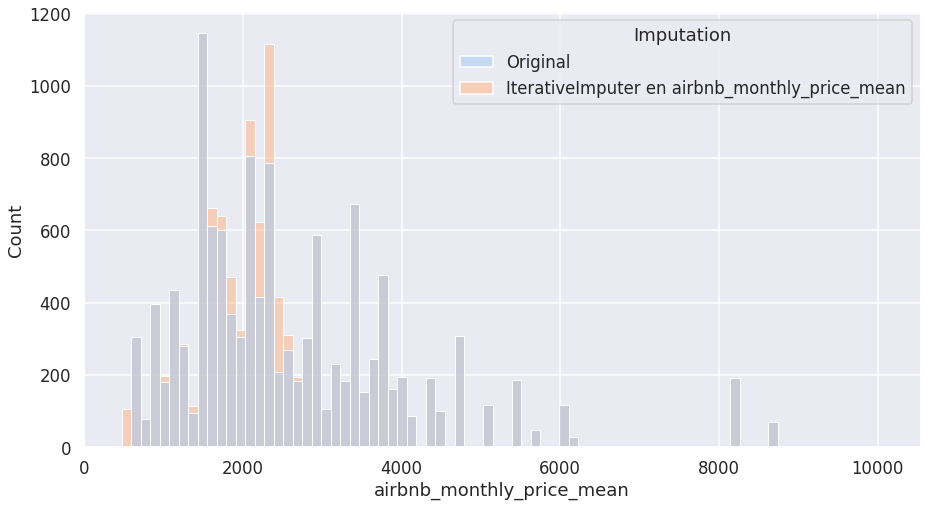

In [ ]:
mntly_original = merged_sales_df[['airbnb_monthly_price_mean']]
mntly_original['Imputation'] = 'Original'
mntly_completo = x_test[['airbnb_monthly_price_mean']]
mntly_completo['Imputation'] = 'IterativeImputer en airbnb_monthly_price_mean'
data = pandas.concat([mntly_original, mntly_completo])
fig = plt.figure(figsize=(15, 8))
seaborn.histplot(data=data, x='airbnb_monthly_price_mean', hue="Imputation")

Al analizar los tres graficos de los precios traidos del dataset de Airbnb, podemos decir que en todos los casos donde imputamos se conserva la forma de la distribución comparandola con la original. 

In [ ]:
# Reemplazo de columnas imputadas en dataframe curado y mergeado

merged_sales_df[imp_columns] = x_test[imp_columns]


In [ ]:
merged_sales_df.isnull().sum()

Suburb                          0
Rooms                           0
Type                            0
Price                           0
Distance                        0
Postcode                        0
Car                             0
Landsize                        0
BuildingArea                 6415
YearBuilt                    5326
CouncilArea                     0
Regionname                      0
Propertycount                   0
Car_cat                         0
dist_cat                        0
reg_cat                         0
Suburb_cat                      0
date_cat                        0
zipcode                        18
airbnb_price_mean               0
airbnb_record_count            18
airbnb_weekly_price_mean        0
airbnb_monthly_price_mean       0
Council_Area                    0
dtype: int64

Como vemos en la tabla anterior, ya no quedan nulos en las variables que seleccionamos para nuestro objetivo (las que aparecen con nulos, no fueron seleccionadas y se descartan en el df final del ejercicio posterior).

# Ejercicio 3


## DATASET CURADO Y MERGEADO (FINAL)

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
delete_columns = [
                  'Suburb',
                  'Postcode',
                  'CouncilArea',
                  'Regionname',
                  'Propertycount',
                  'Car_cat',
                  'dist_cat',
                  'date_cat',
                  'zipcode',
                  'airbnb_record_count',
                  'Council_Area'
]

In [ ]:
merged_sales_df.drop(columns=delete_columns, inplace=True)

In [ ]:
merged_sales_df.isnull().sum()

Rooms                           0
Type                            0
Price                           0
Distance                        0
Car                             0
Landsize                        0
BuildingArea                 6415
YearBuilt                    5326
reg_cat                         0
Suburb_cat                      0
airbnb_price_mean               0
airbnb_weekly_price_mean        0
airbnb_monthly_price_mean       0
dtype: int64

Guardamos el dataframe mergeado en un archivo del directorio local.

Se abrirá una ventana emergente para seleccionar el directorio para la descarga.

In [ ]:
from google.colab import files

merged_sales_df.to_pickle('merged_sales_df.pkl')

files.download('merged_sales_df.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--------
FIN